In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

# Missing data


In [157]:
missing_data_dict = {
    'Pipecolic acid': {'N carbons':6,'Mol weight [g/mol]':129.16},
    'Creatine': {'N carbons':4,'Mol weight [g/mol]':131.13},
    'Alpha-aminoadipate': {'N carbons':6,'Mol weight [g/mol]':161.16},
    'Cis-aconitate': {'N carbons':6,'Mol weight [g/mol]':174.11},
    'Glutarate': {'N carbons':5,'Mol weight [g/mol]':132.11},
    'Alpha-aminobutyrate': {'N carbons':4,'Mol weight [g/mol]':102.11}
}

# Load data

In [158]:
sintef_fn = 'sintef_2023/sintef_2023_rates.csv'
paczia_ecoli_fn = 'paczia_et_al_2013/paczia_13_rates_ecoli_130524.csv'
paczia_cglutamicum_fn = 'paczia_et_al_2013/paczia_13_rates_cglutamicum_130524.csv'
paczia_yeast_fn = 'paczia_et_al_2013/paczia_13_rates_yeast_130524.csv'
paczia_blicheniformis_fn = 'paczia_et_al_2013/paczia_13_rates_blicheniformis_130524.csv'

In [159]:
sintef_df = pd.read_csv(sintef_fn, index_col=0)
paczia_df_ecoli = pd.read_csv(paczia_ecoli_fn, index_col = 0)
paczia_df_cglut = pd.read_csv(paczia_cglutamicum_fn, index_col = 0)
paczia_df_yeast = pd.read_csv(paczia_yeast_fn, index_col = 0)
paczia_df_blich = pd.read_csv(paczia_blicheniformis_fn, index_col = 0)

In [160]:
df = pd.concat([sintef_df, paczia_df_ecoli, paczia_df_cglut, paczia_df_blich,
          paczia_df_yeast])
df['Metabolite'] = df['Metabolite'].str.capitalize()

In [161]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset',
       'Metabolite abbrv.', 'Std.Err [mmol/gDW/h]', 'R2'],
      dtype='object')

In [162]:
paczia_df_yeast

Metabolite abbrv. BiGG ID                 Metabolite  \
0                G6P  s_0568        Glucose-6-phosphate   
1                F6P  s_0557       Fructose-6-phosphate   
2                FBP  s_0555  Fructose-1,6-bisphosphate   
3               DHAP  s_0629  Dihydroxyacetonephosphate   
4                CIT  s_0522                    Citrate   
5                SUC  s_1458                  Succinate   
6                ASN  s_0969                 Asparagine   
7                SER  s_1039                   L-serine   
8                ASP  s_0973                  Aspartate   
9                GLN  s_0999                  Glutamine   
10               TYR  s_1051                   Tyrosine   
11               PRO  s_1035                    Proline   
12               VAL  s_1056                     Valine   
13               PHE  s_1032              Phenylalanine   
14               LYS  s_1025                     Lysine   
15               PYR  s_1399                   Pyruvate   
16               ORO  s_1269                    Orotate   
17               FUM  s_0725                   Fumarate   
18               AKG  s_0180        alpha-ketoglutarate   
19               ACT  s_0362                    Acetate   
20               ETH  s_0680                    Ethanol   

    Metabolite value [gDW/mmol]  Turnover [mmol/gDW/h]  N carbons  \
0                      0.094507               7.400000          6   
1                      0.094507               6.692192          6   
2                      0.098844               0.000000          6   
3                      0.049422               6.463743          3   
4                      0.070808               0.118104          6   
5                      0.050576               0.062829          4   
6                      0.058674               0.044616          4   
7                      0.041619               0.285087          3   
8                      0.047109               0.558052          4   
9                      0.075145               0.333573          5   
10                     0.153178               0.044748          9   
11                     0.089595               0.072254          5   
12                     0.086412               0.116081          5   
13                     0.160693               0.257887          9   
14                     0.120811               0.125557          6   
15                     0.035258              12.357092          3   
16                     0.054629               0.037691          5   
17                     0.045085               0.192240          4   
18                     0.063294               2.271099          5   
19                     0.027744               3.476125          2   
20                     0.040748               0.873217          2   

    Mol weight [g/mol]  Rate [mmol/gDW/h]  Std.Err [mmol/gDW/h]        R2  \
0           260.135781           0.000011              0.000005  0.849093   
1           258.119901           0.000012              0.000001  0.960077   
2           340.115682           0.000468              0.000158  0.687463   
3           168.041961           0.000031              0.000003  0.964164   
4           189.099700           0.000603              0.000079  0.967015   
5           116.072160           0.002548              0.000379  0.937828   
6           132.117920           0.000064              0.000014  0.842799   
7           105.092580           0.000061              0.000022  0.661736   
8           132.094740           0.000011              0.000004  0.717503   
9           146.144500           0.000199              0.000080  0.757300   
10          181.188540           0.000006              0.000003  0.540370   
11          115.130460           0.000929              0.000065  0.985534   
12          117.146340           0.000047              0.000016  0.746188   
13          165.189140           0.000020              0.000009  0.633281   
14          147.195500        

In [163]:
df['Metabolite'].replace('Nad', 'NAD', inplace=True)
df['Metabolite'].replace('Tryptophane', 'Tryptophan', inplace=True)
df['Metabolite'].replace('L-serine', 'Serine', inplace=True)
df['Metabolite'].replace('Hexoses including glucose and fructose', 'Hexoses', inplace=True)
df.reset_index(inplace=True, drop=True)

In [164]:
# idx =df['Metabolite'] == 'Leucine/isoleucine'
# df.loc[328,'Metabolite'] = 'Leucine'
# df.loc[329,'Metabolite'] = 'Isoleucine'
# df.loc[365, 'Metabolite'] = 'Leucine'
# df.loc[366, 'Metabolite'] = 'Isoleucine'

In [165]:
idx = df.loc[df['Metabolite'] == 'Leucine/isoleucine'].index

In [166]:
for idx, row in df.iterrows():
    if row['BiGG ID'] == 'ile__L':
        df.loc[idx, 'Metabolite'] = 'Isoleucine'
        # print(row, f'Changed {idx} to Isoleucine')
    if row['BiGG ID'] == 'leu__L':
        df.loc[idx, 'Metabolite'] = 'Leucine'
        # print(row, f'Changed {idx} to Leucine')
    
    if row['BiGG ID'] == '2pg':
        df.loc[idx, 'Metabolite'] = '2-phosphoglycerate'
        # print(row, f'Changed {idx} to 2-phosphoglycerate')
    if row['BiGG ID'] == '3pg':
        df.loc[idx, 'Metabolite'] = '3-phosphoglycerate'
        # print(row, f'Changed {idx} to 3-phosphoglycerate')
    if row['BiGG ID'] == 'ru5p__D':
        df.loc[idx, 'Metabolite'] = 'Ribulose-5-phosphate'
        # print(row, f'Changed {idx} to Ribulose-5-phosphate')
    if row['BiGG ID'] == 'xu5p__D':
        df.loc[idx, 'Metabolite'] = 'Xylulose-5-phosphate'
        # print(row, f'Changed {idx} to Xylulose-5-phosphate')
    
    
    

In [167]:
# idx =df['Metabolite'] == '2/3-phosphoglycerate'
# df.loc[idx&(df['BiGG ID']=='2pg'), 'Metabolite'] = '2-phosphoglycerate'
# df.loc[idx&(df['BiGG ID']=='3pg'), 'Metabolite'] = '3-phosphoglycerate'
# df.loc[345, 'Metabolite'] = '2-phosphoglycerate'
# df.loc[346, 'Metabolite'] = '3-phosphoglycerate'
# df.loc[366, 'Metabolite'] = '3-phosphoglycerate'

In [168]:
# idx = df['Metabolite'] == 'Ribu-/xylulose-5-phosphate'
# df.loc[idx&(df['BiGG ID']=='ru5p__D'), 'Metabolite'] = 'Ribulose-5-phosphate'
# df.loc[idx&(df['BiGG ID']!='ru5p__D'), 'Metabolite'] = 'Xylulose-5-phosphate'
# df.loc[348, 'Metabolite'] = 'Ribulose-5-phosphate'
# df.loc[349, 'Metabolite'] = 'Xylulose-5-phosphate'

In [169]:
mets = df.Metabolite.str.capitalize().unique()
mets.sort()


# Load additional info

In [170]:
met_info = pd.read_csv('../data/met_info_3.csv')

In [171]:
met_info.rename(columns={'Topological Polar Surface Area []': 'Topological Polar Surface Area'}, inplace=True)

In [172]:
df = df.merge(met_info, left_on='Metabolite', right_on='Metabolite')

In [173]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset',
       'Metabolite abbrv.', 'Std.Err [mmol/gDW/h]', 'R2', 'Mass',
       'Metabolite id', 'Charge', 'Phosphate',
       'Topological Polar Surface Area', 'Intracellular concentration [M]',
       'log P', 'Compound class', 'Ref'],
      dtype='object')

## Add missing values

In [174]:
for key, mdic in missing_data_dict.items():
    idx = df.Metabolite == key
    df.loc[idx, 'N carbons'] = mdic['N carbons']
    df.loc[idx, 'Mol weight [g/mol]'] = mdic['Mol weight [g/mol]']


In [175]:
df.isna().sum()

M                                  116
Metabolite                           0
Carbon source                        0
Rate [mmol/gDW/h]                    0
Rate var                           116
Metabolite value [gDW/mmol]         42
N carbons                            0
Mol weight [g/mol]                   0
Turnover [mmol/gDW/h]               42
BiGG ID                             42
Species                              0
Dataset                              0
Metabolite abbrv.                  232
Std.Err [mmol/gDW/h]               232
R2                                 232
Mass                                 0
Metabolite id                       59
Charge                               4
Phosphate                            4
Topological Polar Surface Area       4
Intracellular concentration [M]     90
log P                                4
Compound class                       0
Ref                                 90
dtype: int64

## Calculate log-transformed values

In [176]:
df['log10(Rate [mmol/gDW/h])'] = np.log10(df['Rate [mmol/gDW/h]'])
df['log10(Metabolite value [gDW/mmol])'] = np.log10(df['Metabolite value [gDW/mmol]'])

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [177]:
df['Rate [mmol C/gDW/h]'] = df['Rate [mmol/gDW/h]']*df['N carbons']
df['Rate [g/gDW/h]'] = df['Rate [mmol/gDW/h]']*df['Mol weight [g/mol]']*1e-3

df['Metabolite value [gDW/mmol C]'] = df['Metabolite value [gDW/mmol]']/df['N carbons']
df['Metabolite value [gDW/g]'] = df['Metabolite value [gDW/mmol]']*1e3/df['Mol weight [g/mol]']


In [178]:
cols = ['Rate [mmol C/gDW/h]', 'Rate [g/gDW/h]', 'Metabolite value [gDW/mmol C]', 'Metabolite value [gDW/g]', 'Turnover [mmol/gDW/h]']
for col in cols:
    logcol = f'log10({col})'
    df[logcol] = np.log10(df[col])

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [179]:
df['Species - Carbon source'] = df['Species'] + ' - ' + df['Carbon source']

In [321]:
for i, row in df.iterrows():
    if np.isfinite(row['Rate var']):
        df.loc[i, 'Std.Err [mmol/gDW/h]'] = np.sqrt(row['Rate var'])

        

In [318]:
df.to_csv('rates_and_values.csv')

In [322]:
rates_only_columns = ['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]',  'Species', 'Dataset',
       'Std.Err [mmol/gDW/h]','Rate [mmol C/gDW/h]','Rate [g/gDW/h]']
df.loc[df.Species=='E. coli', rates_only_columns].to_csv('ecoli_rates.csv')

In [319]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset',
       'Metabolite abbrv.', 'Std.Err [mmol/gDW/h]', 'R2', 'Mass',
       'Metabolite id', 'Charge', 'Phosphate',
       'Topological Polar Surface Area', 'Intracellular concentration [M]',
       'log P', 'Compound class', 'Ref', 'log10(Rate [mmol/gDW/h])',
       'log10(Metabolite value [gDW/mmol])', 'Rate [mmol C/gDW/h]',
       'Rate [g/gDW/h]', 'Metabolite value [gDW/mmol C]',
       'Metabolite value [gDW/g]', 'log10(Rate [mmol C/gDW/h])',
       'log10(Rate [g/gDW/h])', 'log10(Metabolite value [gDW/mmol C])',
       'log10(Metabolite value [gDW/g])', 'log10(Turnover [mmol/gDW/h])',
       'Species - Carbon source', 'log10(Intracell. conc. [mM])',
       'Polar surface area'],
      dtype='object')

# Plot!

In [182]:
df.sort_values(['Species', 'Metabolite'])

M           Metabolite Carbon source  Rate [mmol/gDW/h]  Rate var  \
303  NaN   2-phosphoglycerate       Glucose           0.001376       NaN   
306  NaN   3-phosphoglycerate       Glucose           0.001376       NaN   
343  NaN              Acetate       Glucose           3.001015       NaN   
99   NaN              Alanine       Glucose           0.037155       NaN   
340  NaN  Alpha-ketoglutarate       Glucose           0.014233       NaN   
..   ...                  ...           ...                ...       ...   
161  NaN             Pyruvate       Glucose           0.059366       NaN   
282  NaN               Serine       Glucose           0.000061       NaN   
193  NaN            Succinate       Glucose           0.002548       NaN   
250  NaN             Tyrosine       Glucose           0.000006       NaN   
72   NaN               Valine       Glucose           0.000047       NaN   

     Metabolite value [gDW/mmol]  N carbons  Mol weight [g/mol]  \
303                     0.034358        3.0          184.041361   
306                     0.034358        3.0          184.041361   
343                     0.023425        2.0           59.044020   
99                      0.039315        3.0           89.093180   
340                     0.053729        5.0          144.082260   
..                           ...        ...                 ...   
161                     0.035258        3.0           87.054120   
282                     0.041619        3.0          105.092580   
193                     0.050576        4.0          116.072160   
250                     0.153178        9.0          181.188540   
72                      0.086412        5.0          117.146340   

     Turnover [mmol/gDW/h] BiGG ID  ... Rate [mmol C/gDW/h] Rate [g/gDW/h]  \
303               8.110633     2pg  ...            0.004127       0.000253   
306               9.380943     3pg  ...            0.004127       0.000253   
343               1.436057      ac  ...            6.002030       0.177192   
99                2.430872  ala__L  ...            0.111466       0.003310   
340               6.890831     akg  ...            0.071166       0.002051   
..                     ...     ...  ...                 ...            ...   
161              12.357092  s_1399  ...            0.178098       0.005168   
282               0.285087  s_1039  ...            0.000184       0.000006   
193               0.062829  s_1458  ...            0.010190       0.000296   
250               0.044748  s_1051  ...            0.000052       0.000001   
72                0.116081  s_1056  ...            0.000234       0.000005   

    Metabolite value [gDW/mmol C]  Metabolite value [gDW/g]  \
303                      0.011453                  0.186687   
306                      0.011453                  0.186687   
343                      0.011713                  0.396744   
99                       0.013105                  0.441281   
340                      0.010746                  0.372908   
..                            ...                       ...   
161                      0.011753                  0.405014   
282                      0.013873                  0.396020   
193                      0.012644                  0.435726   
250                      0.017020                  0.845408   
72                       0.017282                  0.737641   

     log10(Rate [mmol C/gDW/h])  log10(Rate [g/gDW/h])  \
303                   -2.384368              -3.596574   
306                   -2.384368              -3.596574   
343                    0.778298              -0.751556   
99                    -0.952859              -2.480136   
340                   -1.147725              -2.688084   
..                          ...                    ...   
161                   -0.749341              -2.286673   
282                   -3.735747              -5.191296   
193                   -1.991815              -3.529147   
250            

In [183]:
df.loc[df.Species=='E. coli',:].sort_values(['log10(Rate [mmol/gDW/h])', 'Metabolite'], ascending=False).head(30)

M           Metabolite Carbon source  Rate [mmol/gDW/h]      Rate var  \
342  NaN              Acetate       Glucose           1.666430           NaN   
159  NaN             Pyruvate       Glucose           0.621553           NaN   
156   M6             Pyruvate      L-malate           0.290876  1.455076e-04   
189   M7            Succinate      L-malate           0.251380  1.651722e-01   
271  M11  Alpha-aminobutyrate     L-alanine           0.205927  1.449920e-03   
270  M10  Alpha-aminobutyrate     L-alanine           0.201636  2.730044e-03   
269   M9  Alpha-aminobutyrate     L-alanine           0.171957  1.478877e-03   
157   M7             Pyruvate      L-malate           0.136063  3.258989e-03   
331  NaN              Orotate       Glucose           0.126669           NaN   
155   M5             Pyruvate      L-malate           0.120035  5.612836e-03   
272   M9              Glycine     L-alanine           0.048460  1.598842e-04   
273  M10              Glycine     L-alanine           0.039698  9.727897e-05   
186   M3            Succinate     Galactose           0.031035  3.523322e-05   
274  M11              Glycine     L-alanine           0.030233  4.395965e-05   
215   M5              Citrate      L-malate           0.016968           inf   
337  NaN               Uracil       Glucose           0.014173           NaN   
192  M11            Succinate     L-alanine           0.010570  7.037565e-06   
136  M10           Asparagine     L-alanine           0.010157  1.053499e-05   
50   M10  Gamma-aminobutyrate     L-alanine           0.009867  1.001078e-07   
49    M9  Gamma-aminobutyrate     L-alanine           0.007653  3.966387e-08   
174  M11              Hexoses     L-alanine           0.007640           inf   
51   M11  Gamma-aminobutyrate     L-alanine           0.007455  3.645529e-08   
135   M9           Asparagine     L-alanine           0.006835  1.601635e-05   
221  NaN              Citrate       Glucose           0.006827           NaN   
218   M9              Citrate     L-alanine           0.006538           inf   
184   M1            Succinate     Galactose           0.006382  3.668953e-06   
137  M11           Asparagine     L-alanine           0.005749  2.348170e-05   
146   M7            Aspartate      L-malate           0.005570  8.670989e-05   
200   M9               Malate     L-alanine           0.005566  3.020051e-06   
194   M1               Malate     Galactose           0.005498           inf   

     Metabolite value [gDW/mmol]  N carbons  Mol weight [g/mol]  \
342                     0.003520        2.0            59.04402   
159                     0.010366        3.0            87.05412   
156                     0.005981        3.0            87.05412   
189                     0.008195        4.0           116.07216   
271                          NaN        4.0           102.11000   
270                          NaN        4.0           102.11000   
269                          NaN        4.0           102.11000   
157                     0.005981        3.0            87.05412   
331                     0.027940        5.0           155.08832   
155                     0.005981        3.0            87.05412   
272                     0.033782        2.0            75.06660   
273                     0.033782        2.0            75.06660   
186                     0.035520        4.0           116.07216   
274                     0.033782        2.0            75.06660   
215                     0.013154        6.0           189.09970   
337                     0.052275        4.0           112.08676   
192                     0.037844        4.0           116.07216   
136                     0.044251        4.0           132.11792   
50                      0.040011        4.0           103.11976   
49                      0.040011        4.0           103.11976   
174                     0.091846        6.0           180.15588   
51                      0.040011        4.0         

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


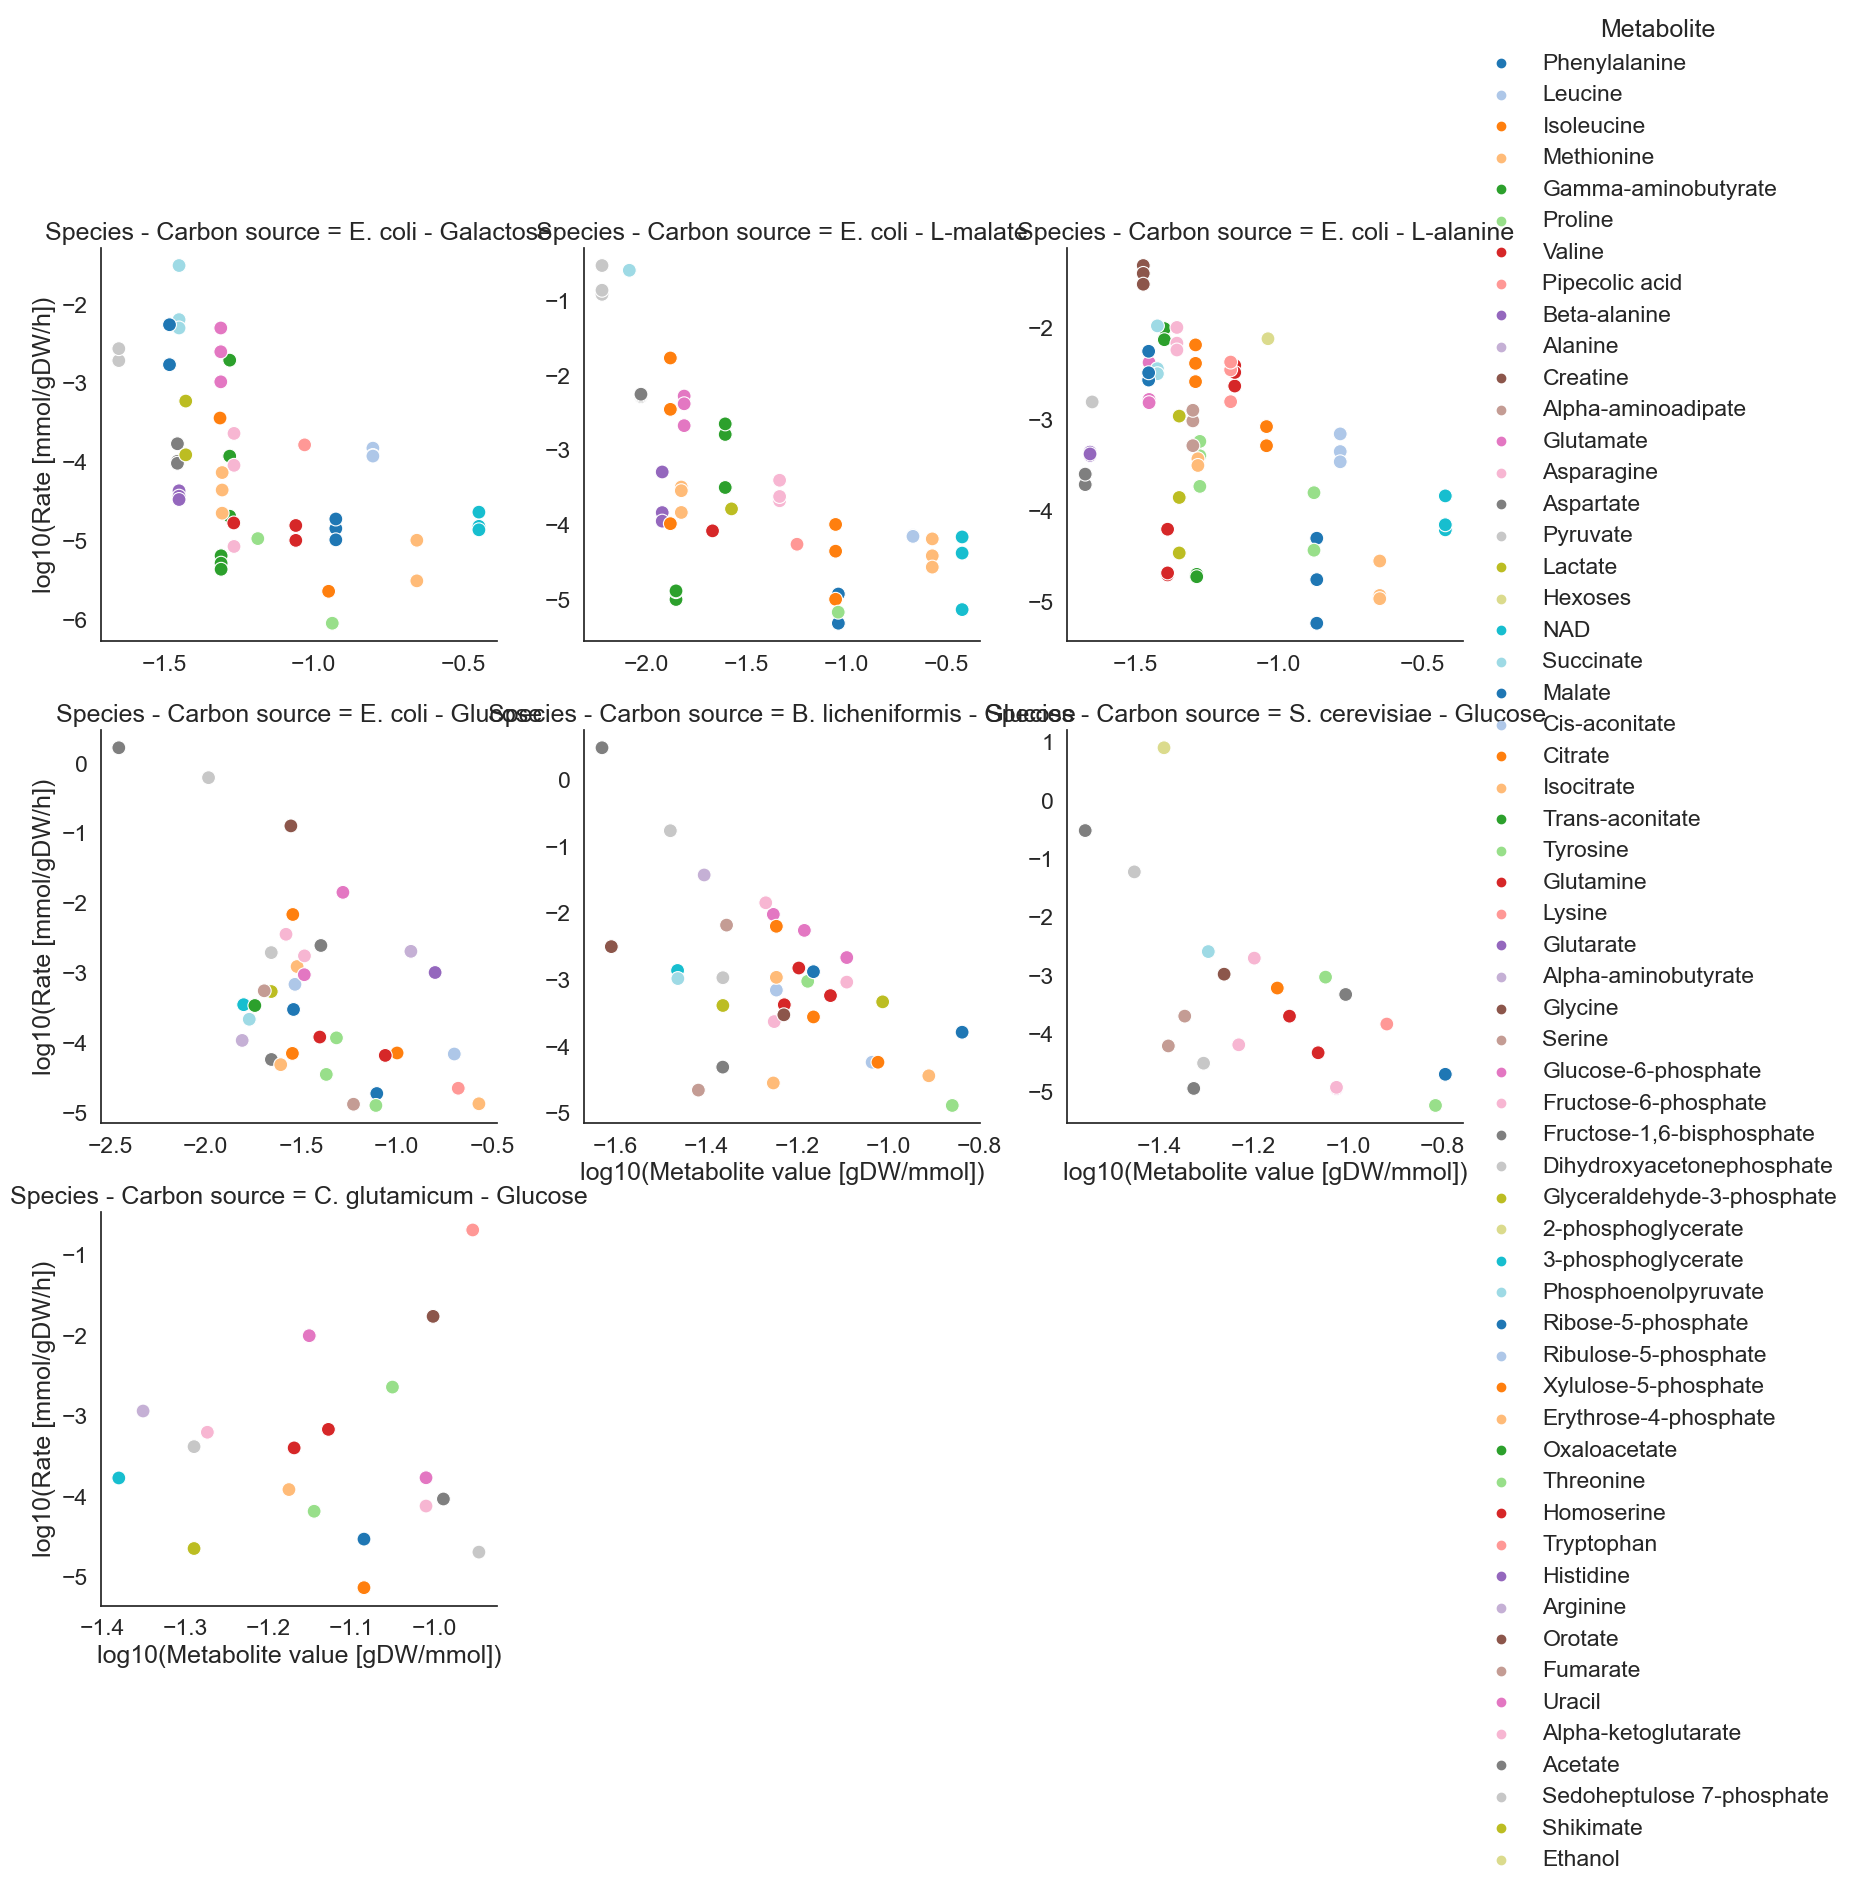

In [184]:
sns.relplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False}, palette = 'tab20')
plt.show()

In [185]:
df['log10(Intracell. conc. [mM])']=np.log10(df['Intracellular concentration [M]']*1e3)

In [188]:
df_no_cg = df.loc[df.Species!='C. glutamicum', :]
df_no_cg_no_nad = df_no_cg.loc[df_no_cg.Metabolite !='NAD', :]

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


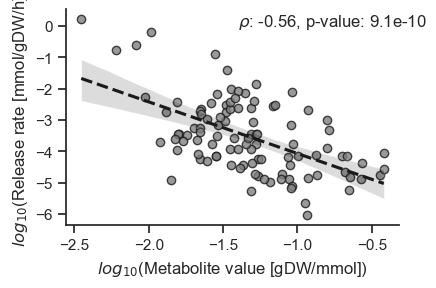

In [191]:
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel(r'$log_{10}$(Metabolite value [gDW/mmol])')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log10(Metabolite value [gDW/mmol])', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log10(Metabolite value [gDW/mmol])'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-1.4, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('value_vs_release.pdf')
plt.savefig('value_vs_release.png', dpi = 400, bbox_inches="tight")
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


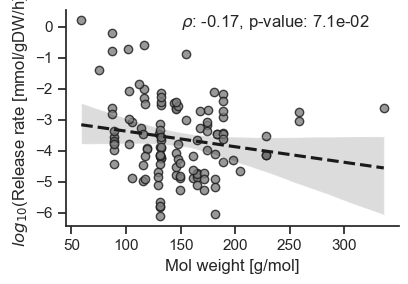

In [192]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df_no_cg_no_nad.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'Mol weight [g/mol]', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel('Mol weight [g/mol]')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['Mol weight [g/mol]', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['Mol weight [g/mol]'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(150, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('mw_vs_release_no_nad.pdf')
plt.savefig('mw_vs_release_no_nad.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


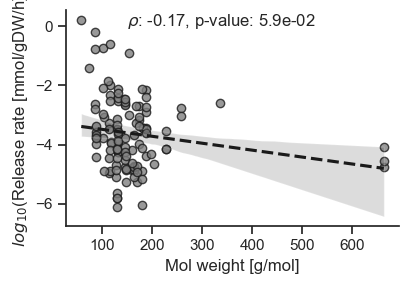

In [193]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'Mol weight [g/mol]', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel('Mol weight [g/mol]')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['Mol weight [g/mol]', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['Mol weight [g/mol]'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(150, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('mw_vs_release.pdf')
plt.savefig('mw_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


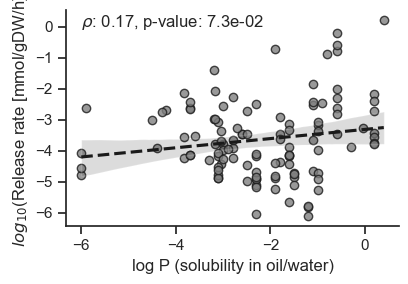

In [195]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'log P', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel('log P (solubility in oil/water)')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log P', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log P'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-6, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('logP_vs_release.pdf')
plt.savefig('logP_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


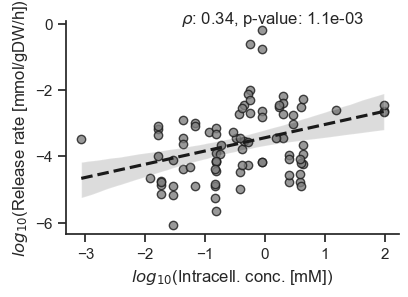

In [198]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'log10(Intracell. conc. [mM])', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel(r'$log_{10}$(Intracell. conc. [mM])')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log10(Intracell. conc. [mM])', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log10(Intracell. conc. [mM])'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-1.4, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('conc_vs_release.pdf')
plt.savefig('conc_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


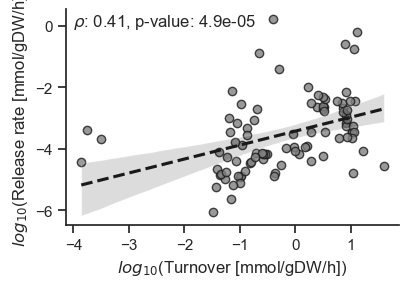

In [199]:
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
df_mean.replace([-np.inf, np.inf], np.nan, inplace=True)
notnan_idx = ~df_mean[['log10(Turnover [mmol/gDW/h])', 'log10(Rate [mmol/gDW/h])']].isna().any(axis=1)
s_idx = df_mean.Species=='E. coli'
sns.lmplot(data = df_mean.loc[notnan_idx&s_idx,:], x = 'log10(Turnover [mmol/gDW/h])', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel(r'$log_{10}$(Turnover [mmol/gDW/h])')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log10(Turnover [mmol/gDW/h])', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log10(Turnover [mmol/gDW/h])'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-4, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
plt.savefig('turnover_vs_release.pdf')
plt.savefig('turnover_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will 

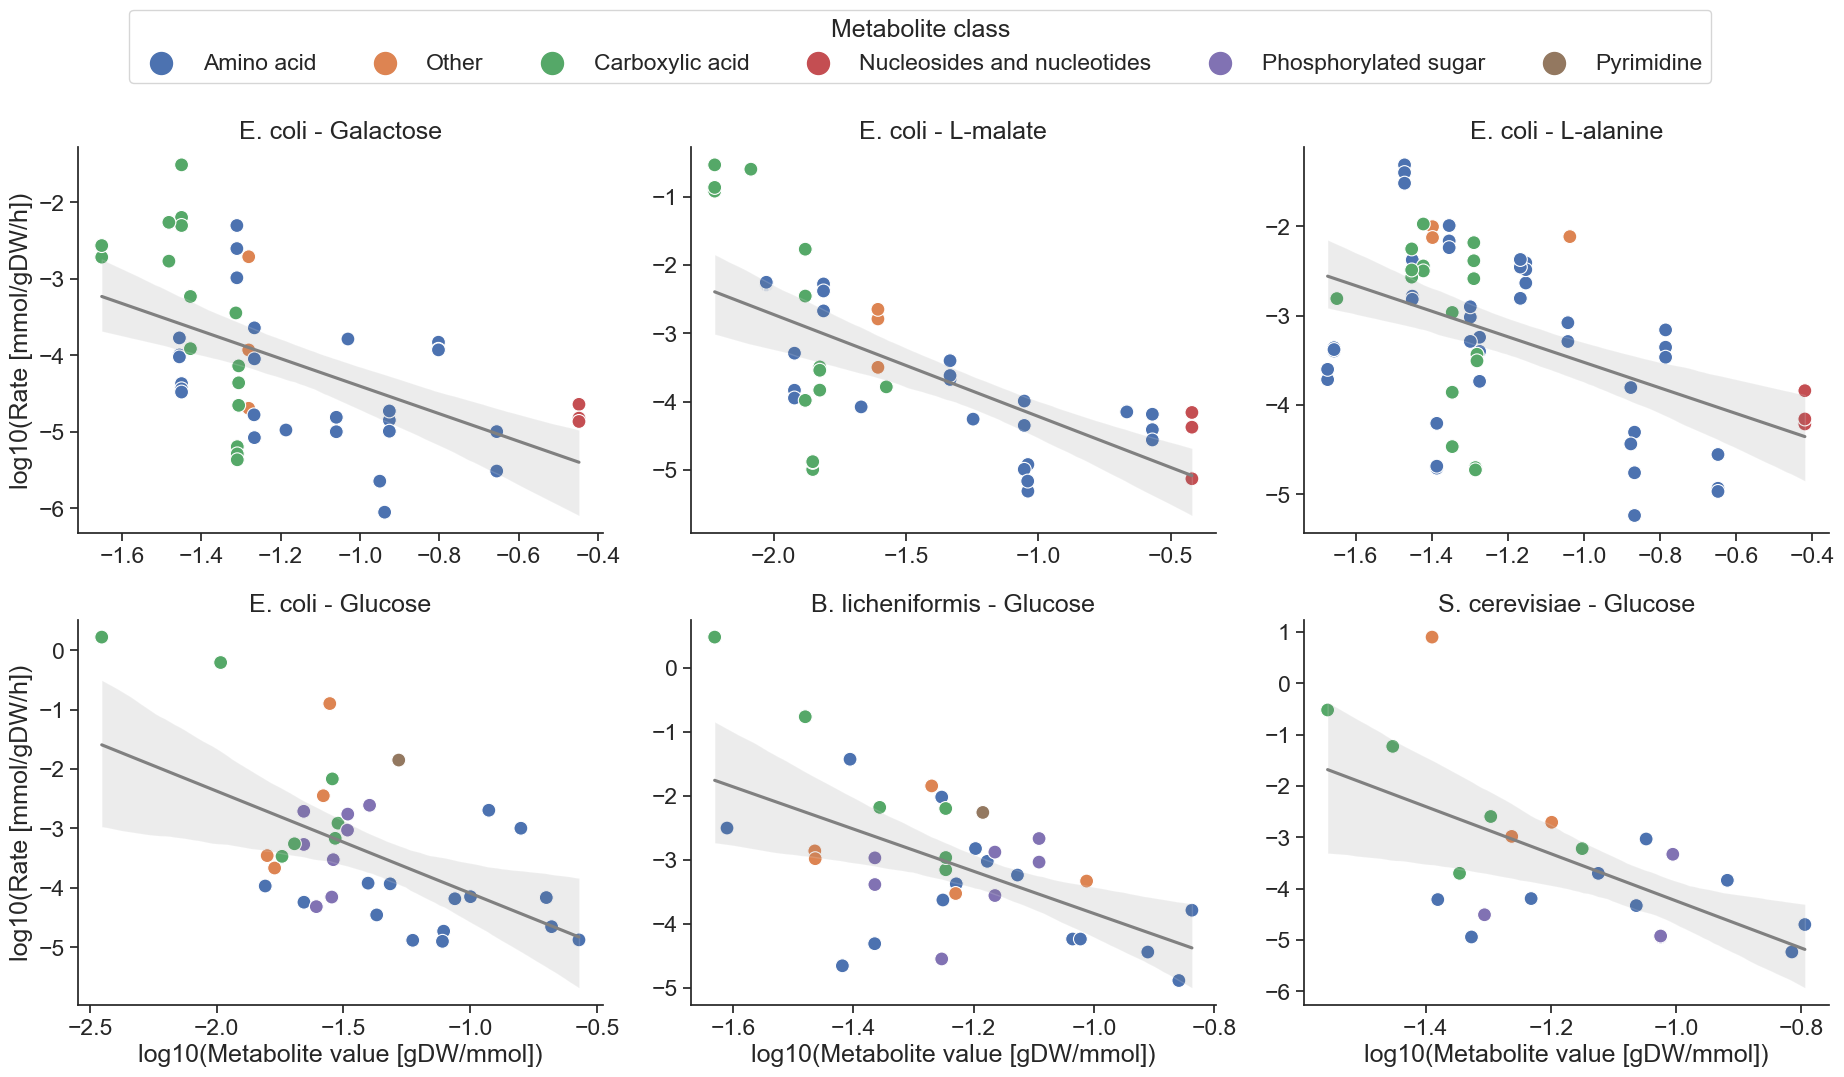

In [200]:
sns.set(font_scale = 1.5, style = 'ticks')
p = sns.relplot(data = df_no_cg, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Compound class', s = 100, facet_kws={'sharex': False, 'sharey': False})
p.map(sns.regplot, 'log10(Metabolite value [gDW/mmol])', 'log10(Rate [mmol/gDW/h])', scatter = False, color = 'gray')
p.set_titles(col_template="{col_name}", row_template="{row_name}")
sns.move_legend(
    p, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title='Metabolite class', frameon=True,
)
for lh in p.legend.legend_handles: 
    lh._sizes = [250] 
plt.tight_layout()
# sns.regplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, scatter=False, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('value_vs_rate.png', dpi = 400, bbox_inches="tight")
plt.savefig('value_vs_rate.pdf', bbox_inches="tight")
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


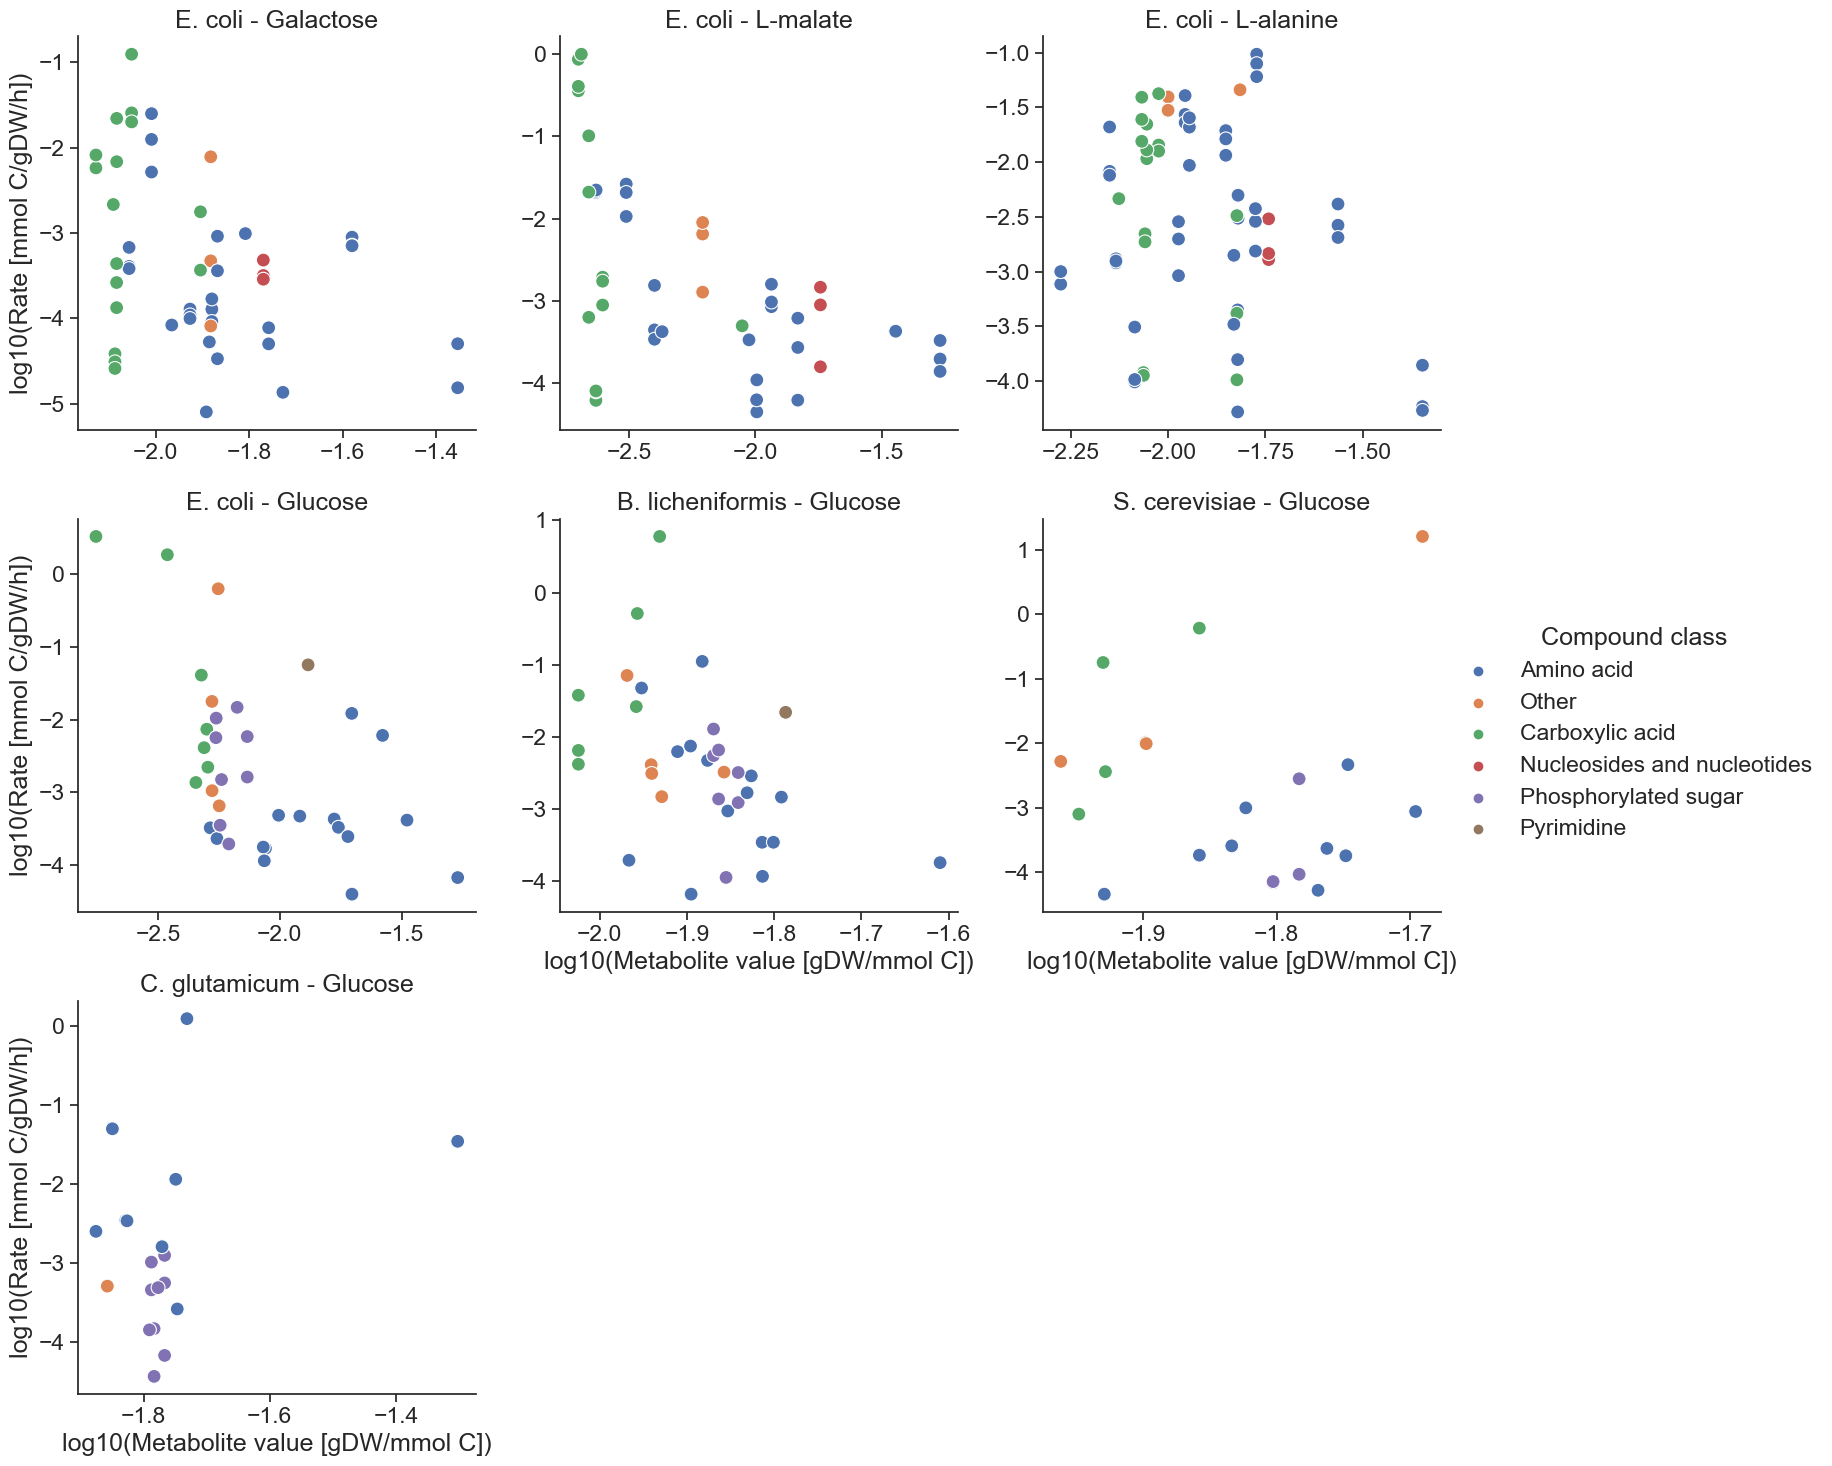

In [201]:
sns.set(font_scale = 1.5, style = 'ticks')
p = sns.relplot(data = df, x = 'log10(Metabolite value [gDW/mmol C])', y = 'log10(Rate [mmol C/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Compound class', s = 100, facet_kws={'sharex': False, 'sharey': False})
p.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will 

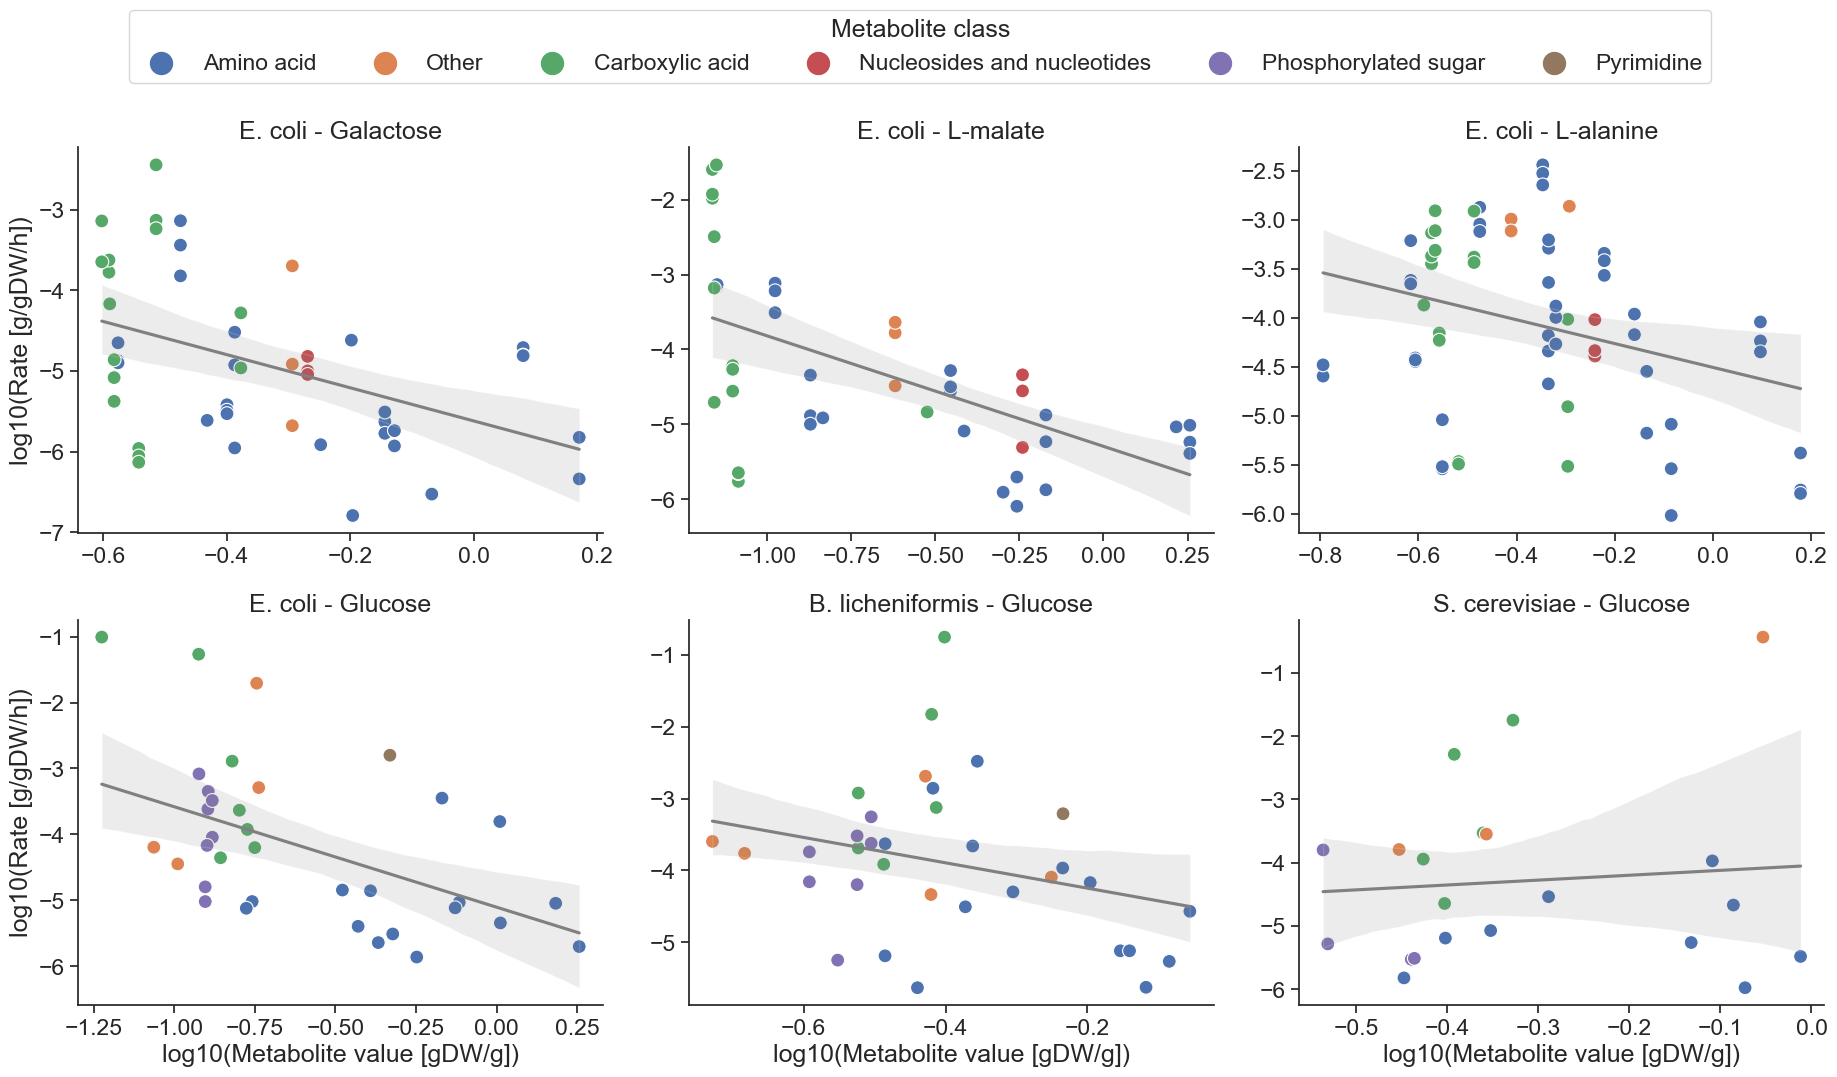

In [202]:
p = sns.relplot(data = df_no_cg, x = 'log10(Metabolite value [gDW/g])', y = 'log10(Rate [g/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Compound class', s = 100, facet_kws={'sharex': False, 'sharey': False})
p.map(sns.regplot, 'log10(Metabolite value [gDW/g])', 'log10(Rate [g/gDW/h])', scatter = False, color = 'gray')
p.set_titles(col_template="{col_name}", row_template="{row_name}")
sns.move_legend(
    p, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title='Metabolite class', frameon=True,
)
for lh in p.legend.legend_handles: 
    lh._sizes = [250] 
plt.tight_layout()
# sns.regplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, scatter=False, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('value_vs_rate_g.png', dpi = 400, bbox_inches="tight")
plt.savefig('value_vs_rate_g.pdf', bbox_inches="tight")
plt.show()

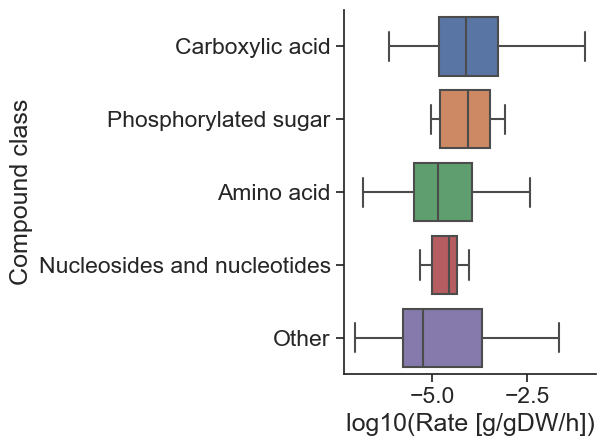

In [203]:
sns.boxplot(data = df.loc[df.Species=='E. coli'], y = 'Compound class', x = 'log10(Rate [g/gDW/h])', order=['Carboxylic acid', 'Phosphorylated sugar', 'Amino acid', 'Nucleosides and nucleotides', 'Other'])
sns.despine()
plt.tight_layout()
plt.savefig('boxplot_rates.png', dpi = 400)
plt.show()

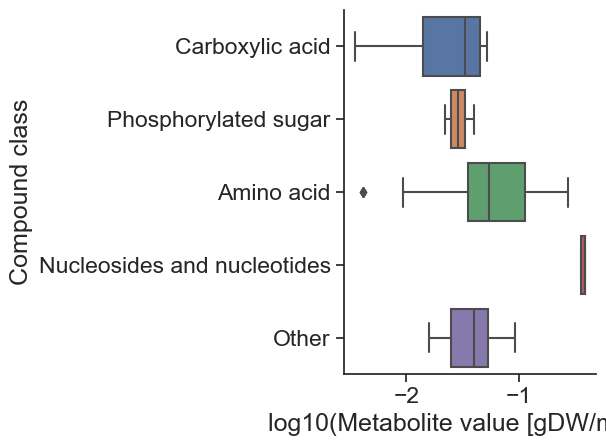

In [204]:
sns.boxplot(data = df.loc[df.Species=='E. coli'], y = 'Compound class', x = 'log10(Metabolite value [gDW/mmol])', order=['Carboxylic acid', 'Phosphorylated sugar', 'Amino acid', 'Nucleosides and nucleotides', 'Other'])
sns.despine()
plt.tight_layout()
plt.savefig('boxplot_values.png', dpi = 400)
plt.show()

In [205]:
sns.lmplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [206]:
sns.lmplot(data = df, x = 'log10(Metabolite value [gDW/mmol C])', y = 'log10(Rate [mmol C/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


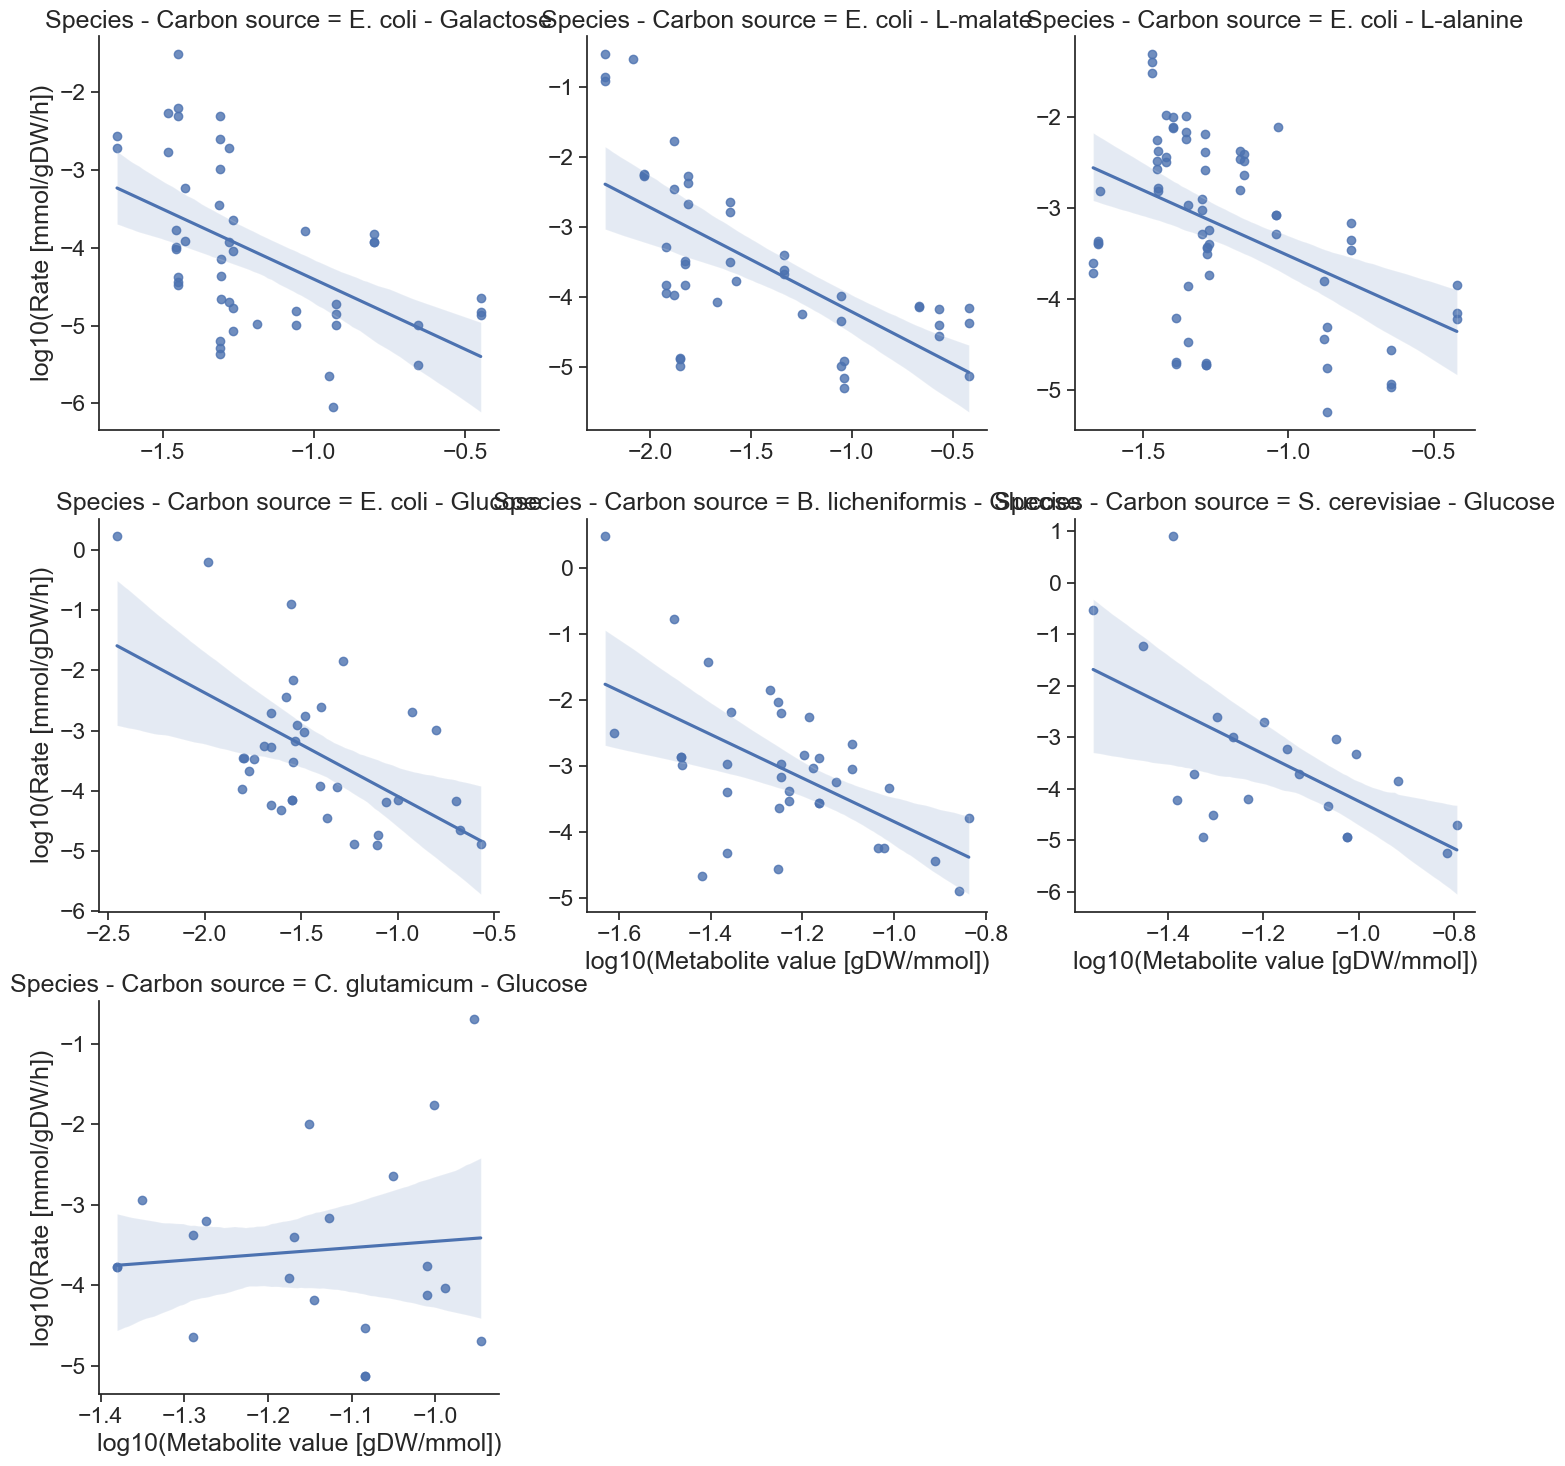

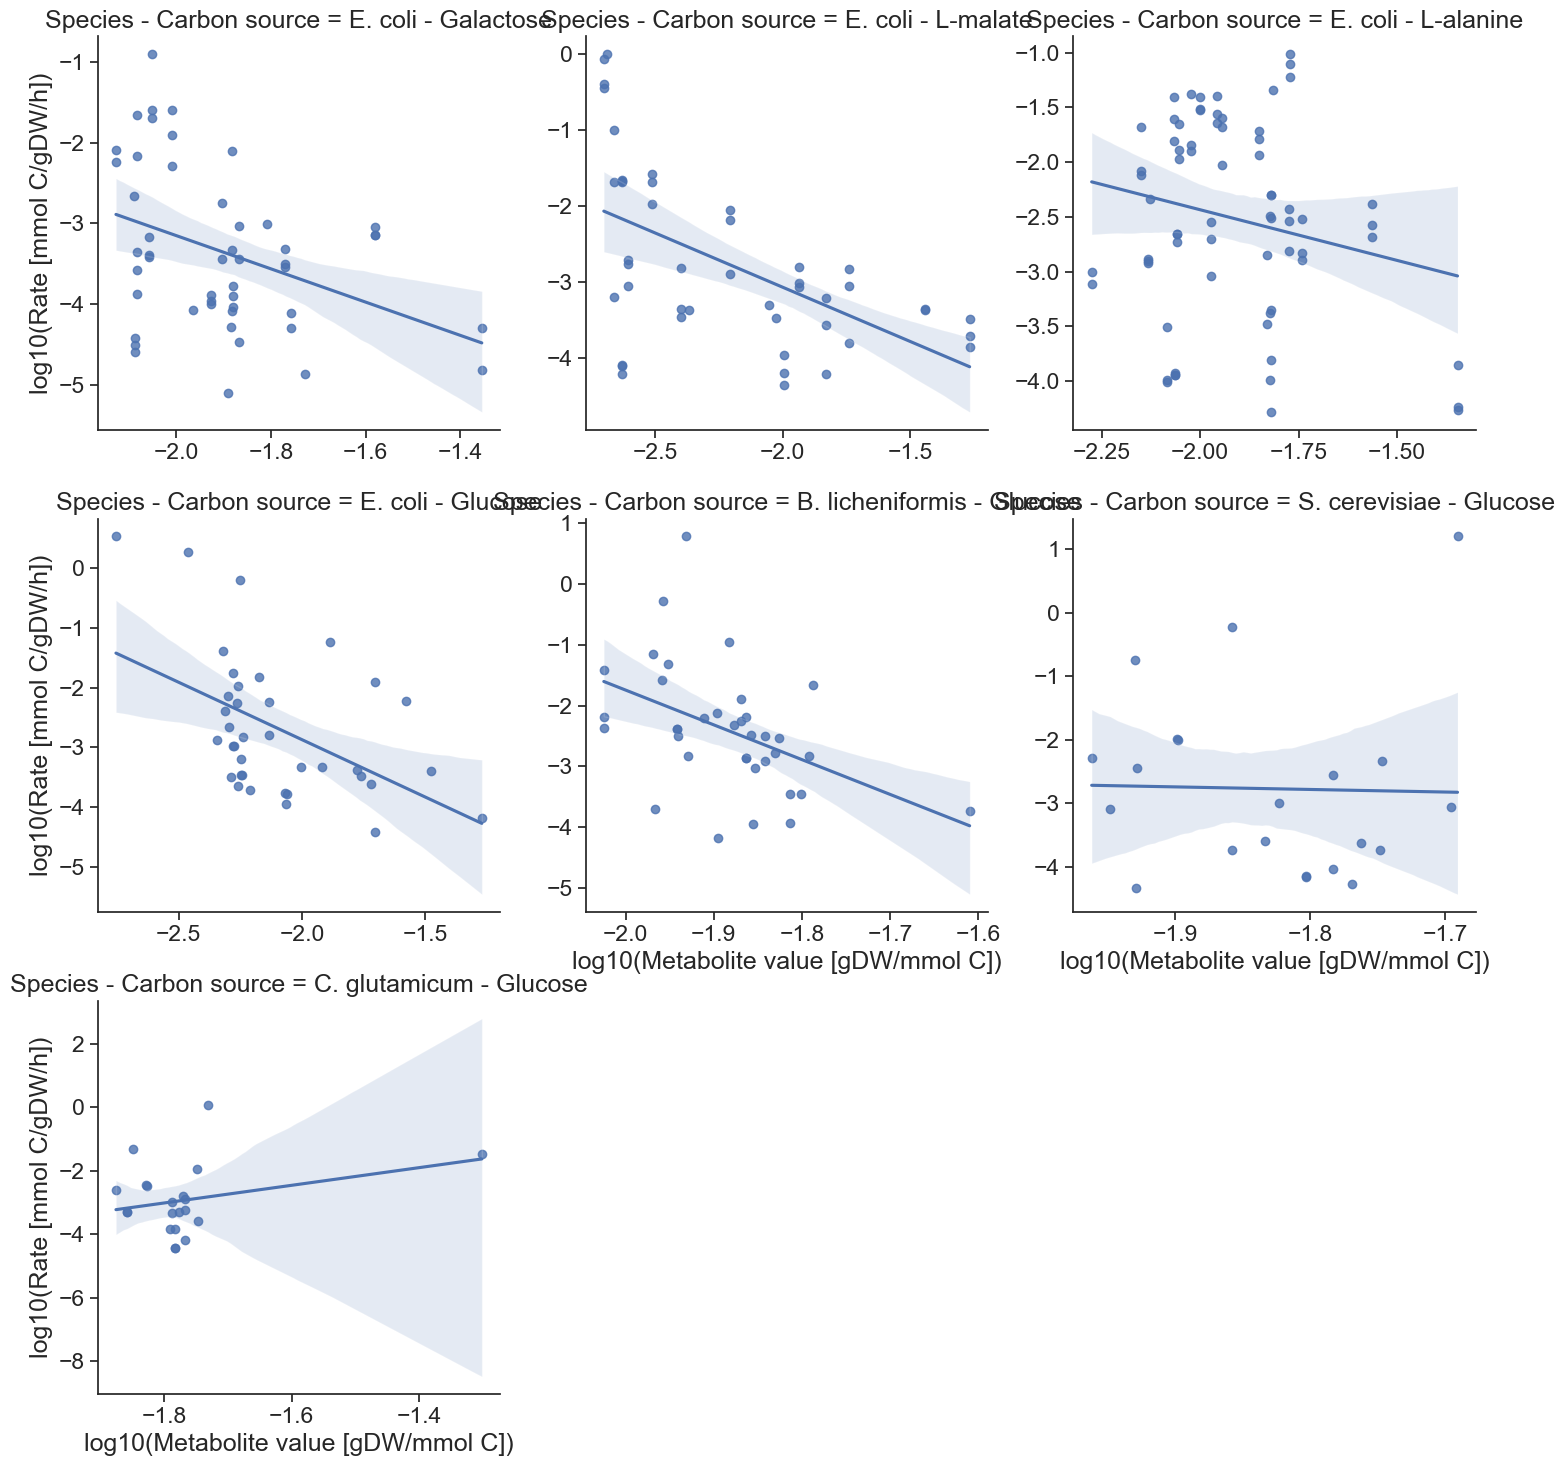

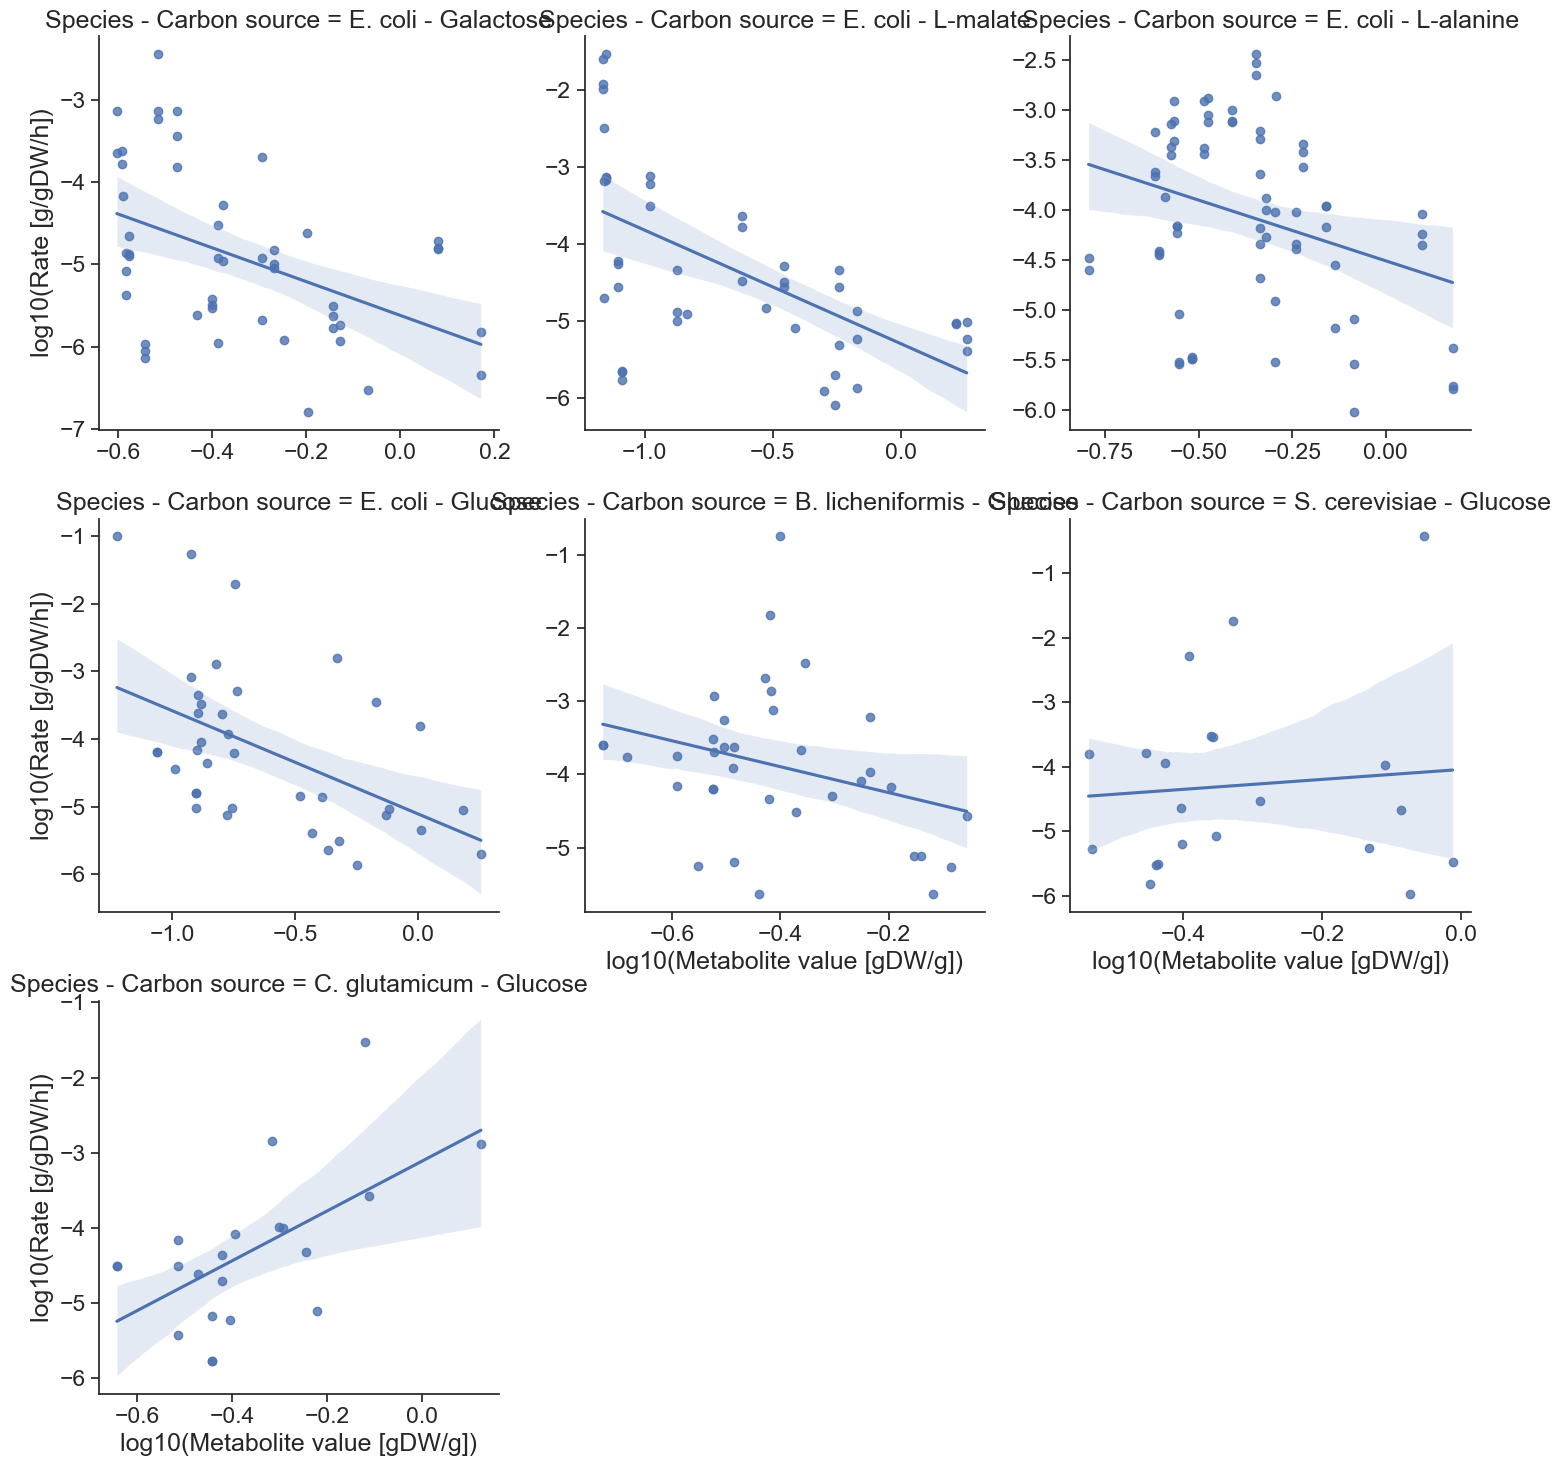

In [207]:
sns.lmplot(data = df, x = 'log10(Metabolite value [gDW/g])', y = 'log10(Rate [g/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})
plt.show()

In [212]:
'Metabolite', 'Carbon source',
xvarsL = ['Mol weight [g/mol]', 'Topological Polar Surface Area', 'log10(Intracell. conc. [mM])', 'log P', 'log10(Rate [mmol/gDW/h])','Charge','Phosphate',
       'log10(Metabolite value [gDW/mmol])','log10(Turnover [mmol/gDW/h])']
xvarsS = ['Mol weight [g/mol]', 'Topological Polar Surface Area', 'log10(Intracell. conc. [mM])', 'log P',
       'log10(Metabolite value [gDW/mmol])', 'log10(Rate [mmol/gDW/h])']

In [213]:
df['Polar surface area'] = df['Topological Polar Surface Area']

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


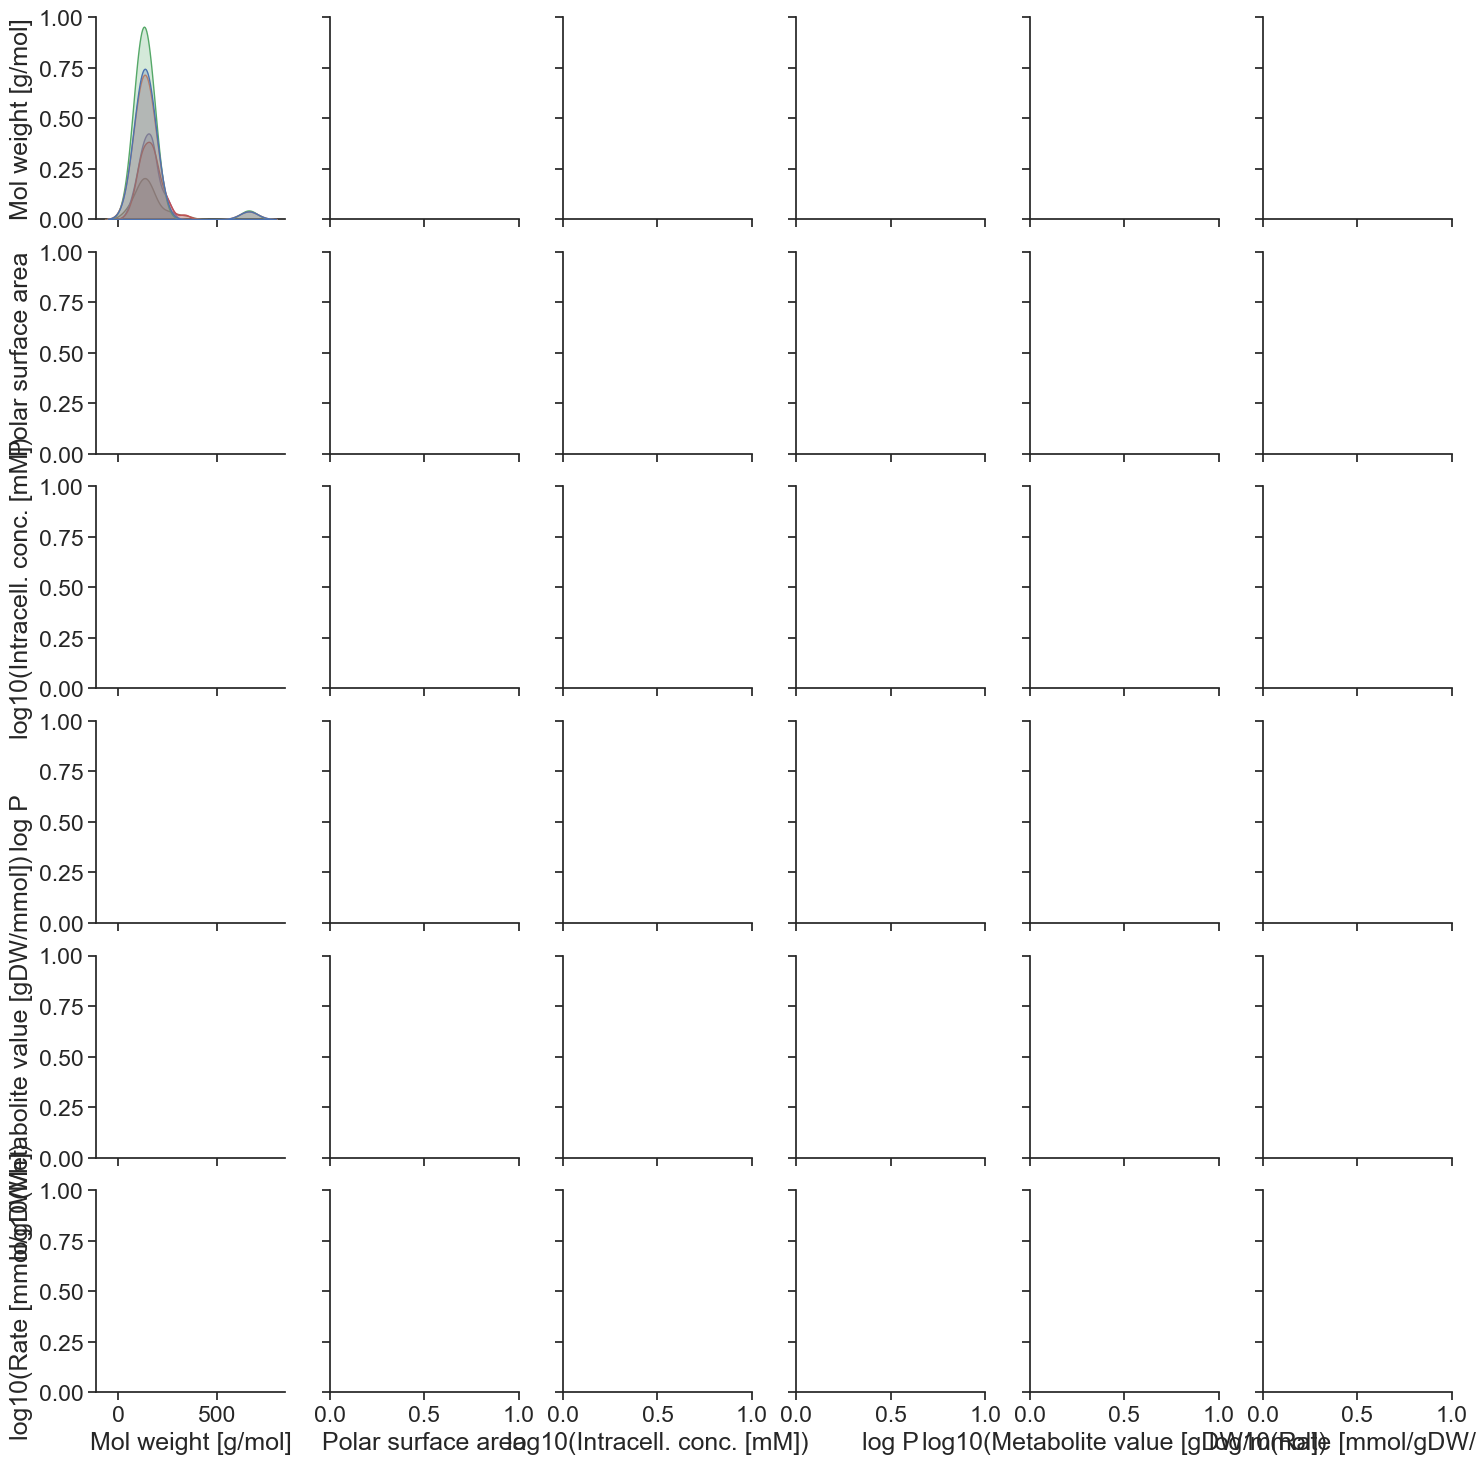

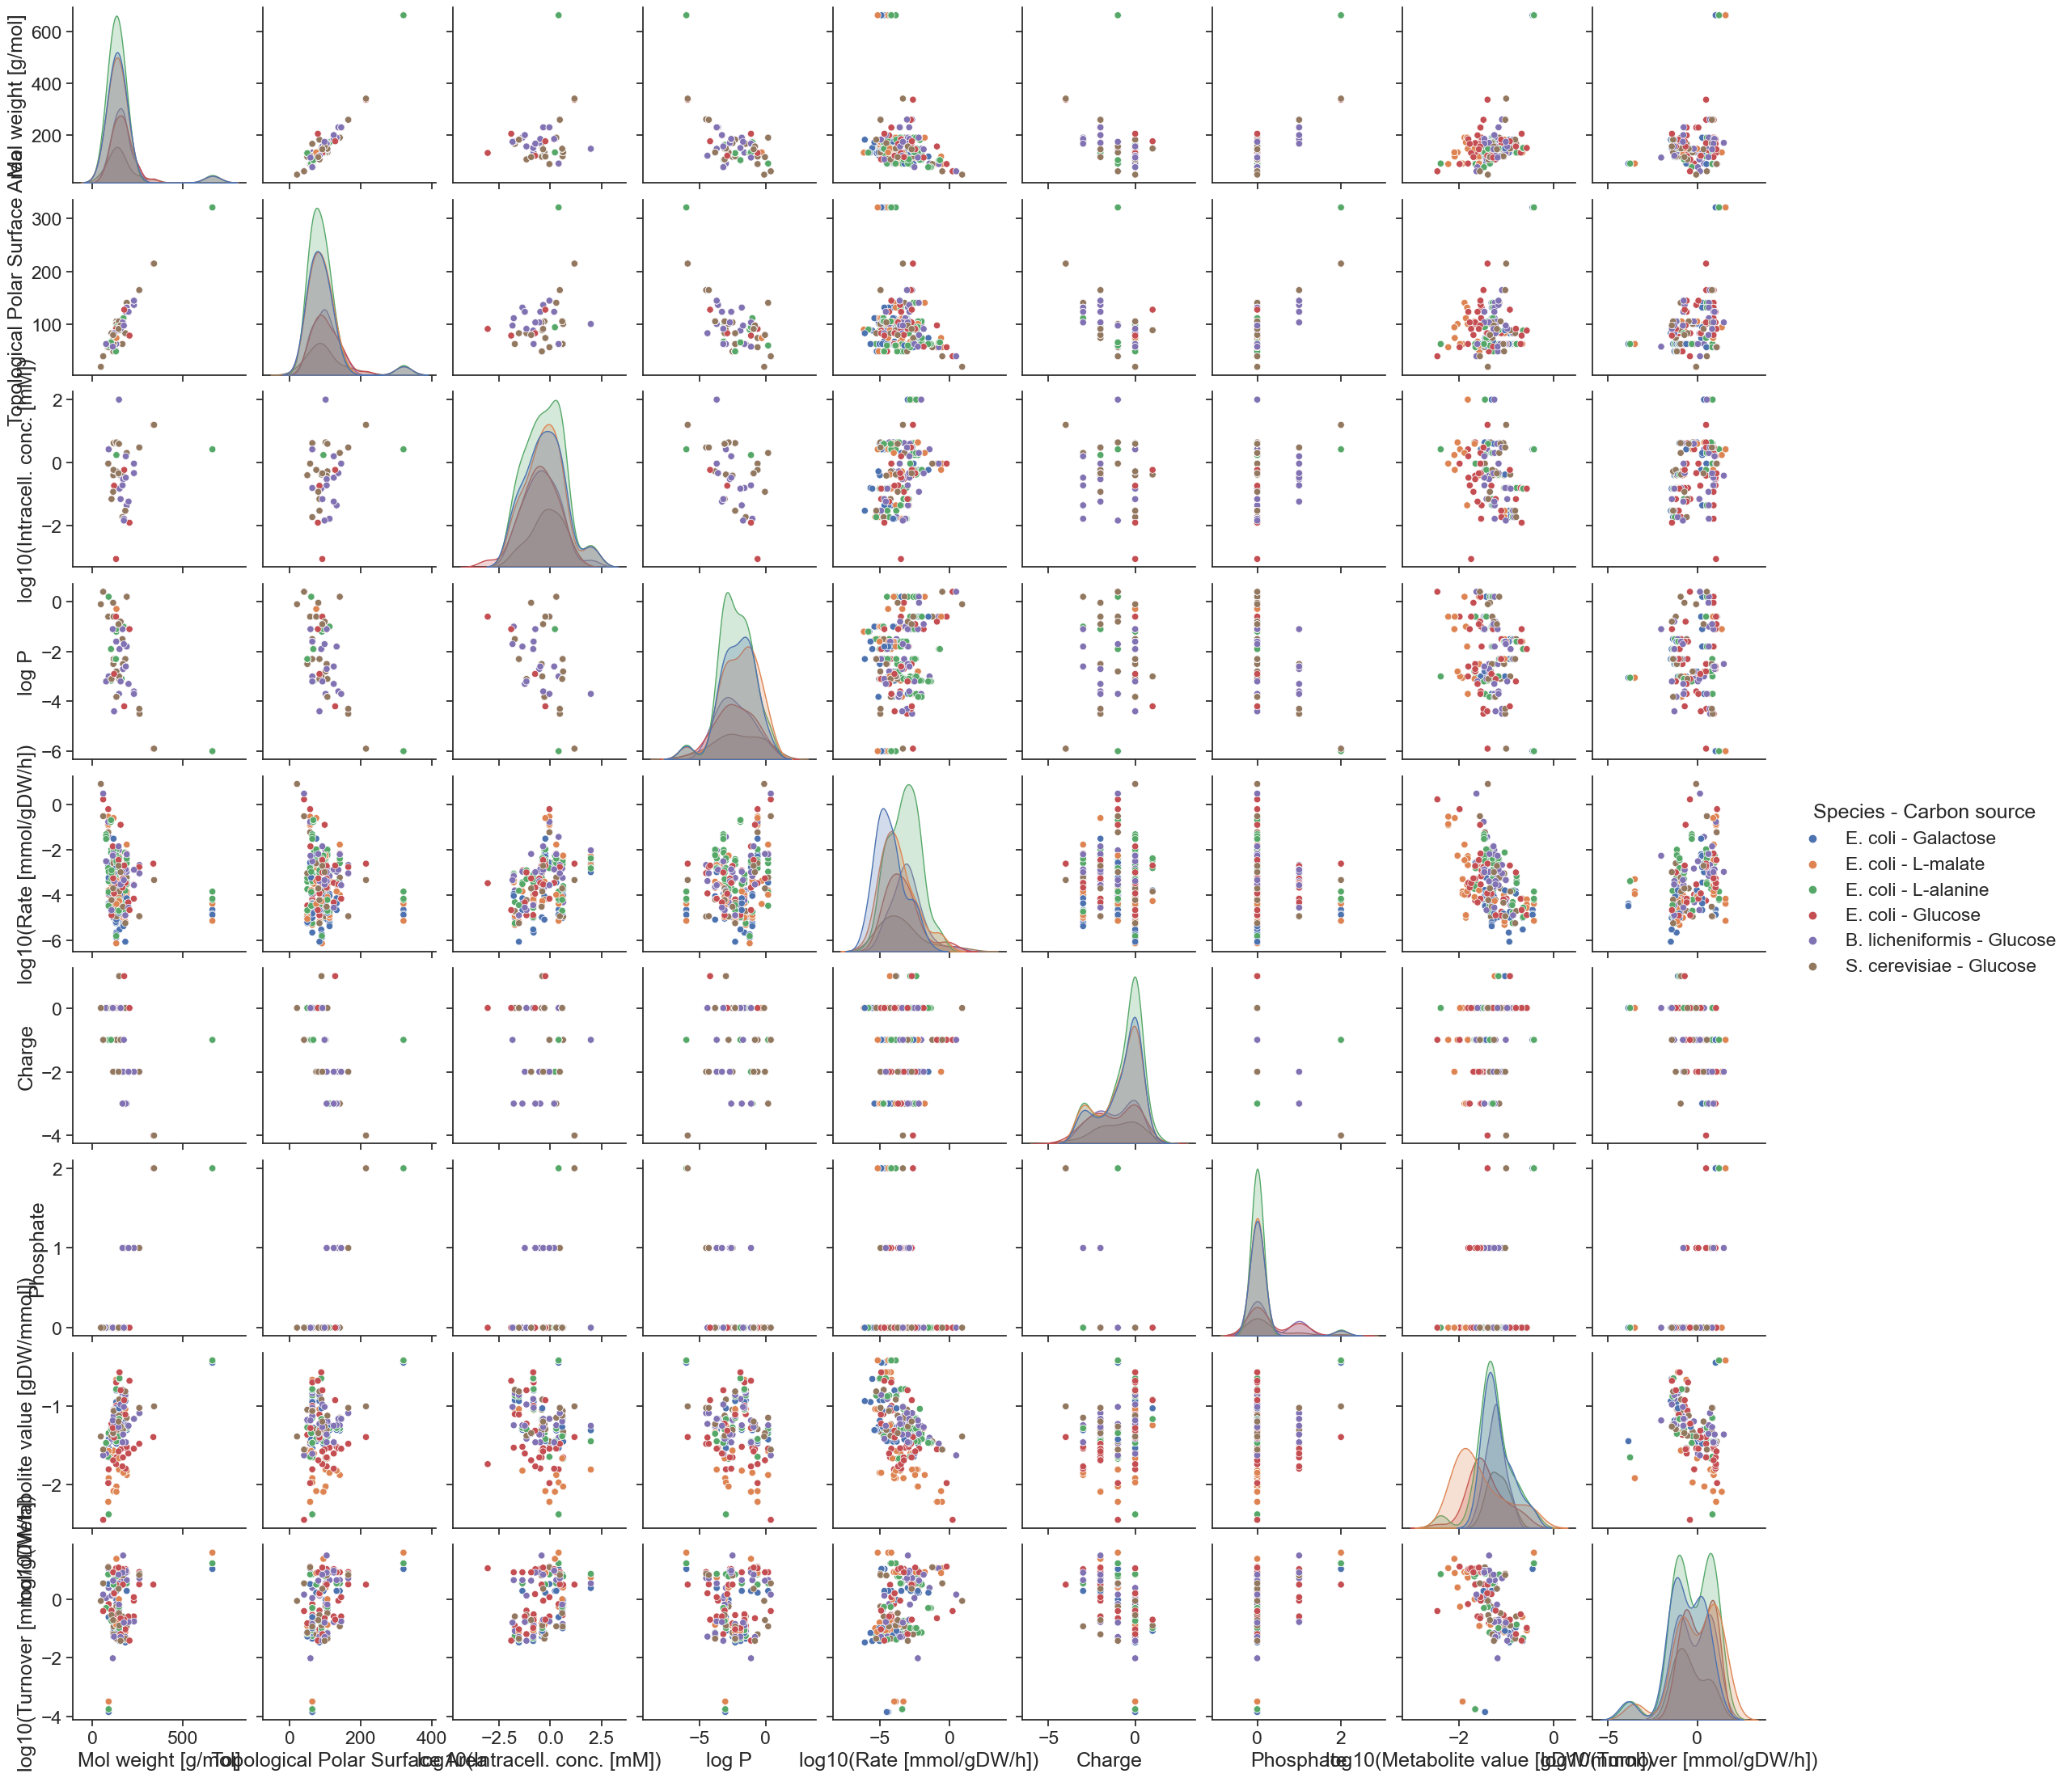

In [214]:
sns.pairplot(df_no_cg, x_vars=xvarsL, y_vars=xvarsL, hue = 'Species - Carbon source')
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


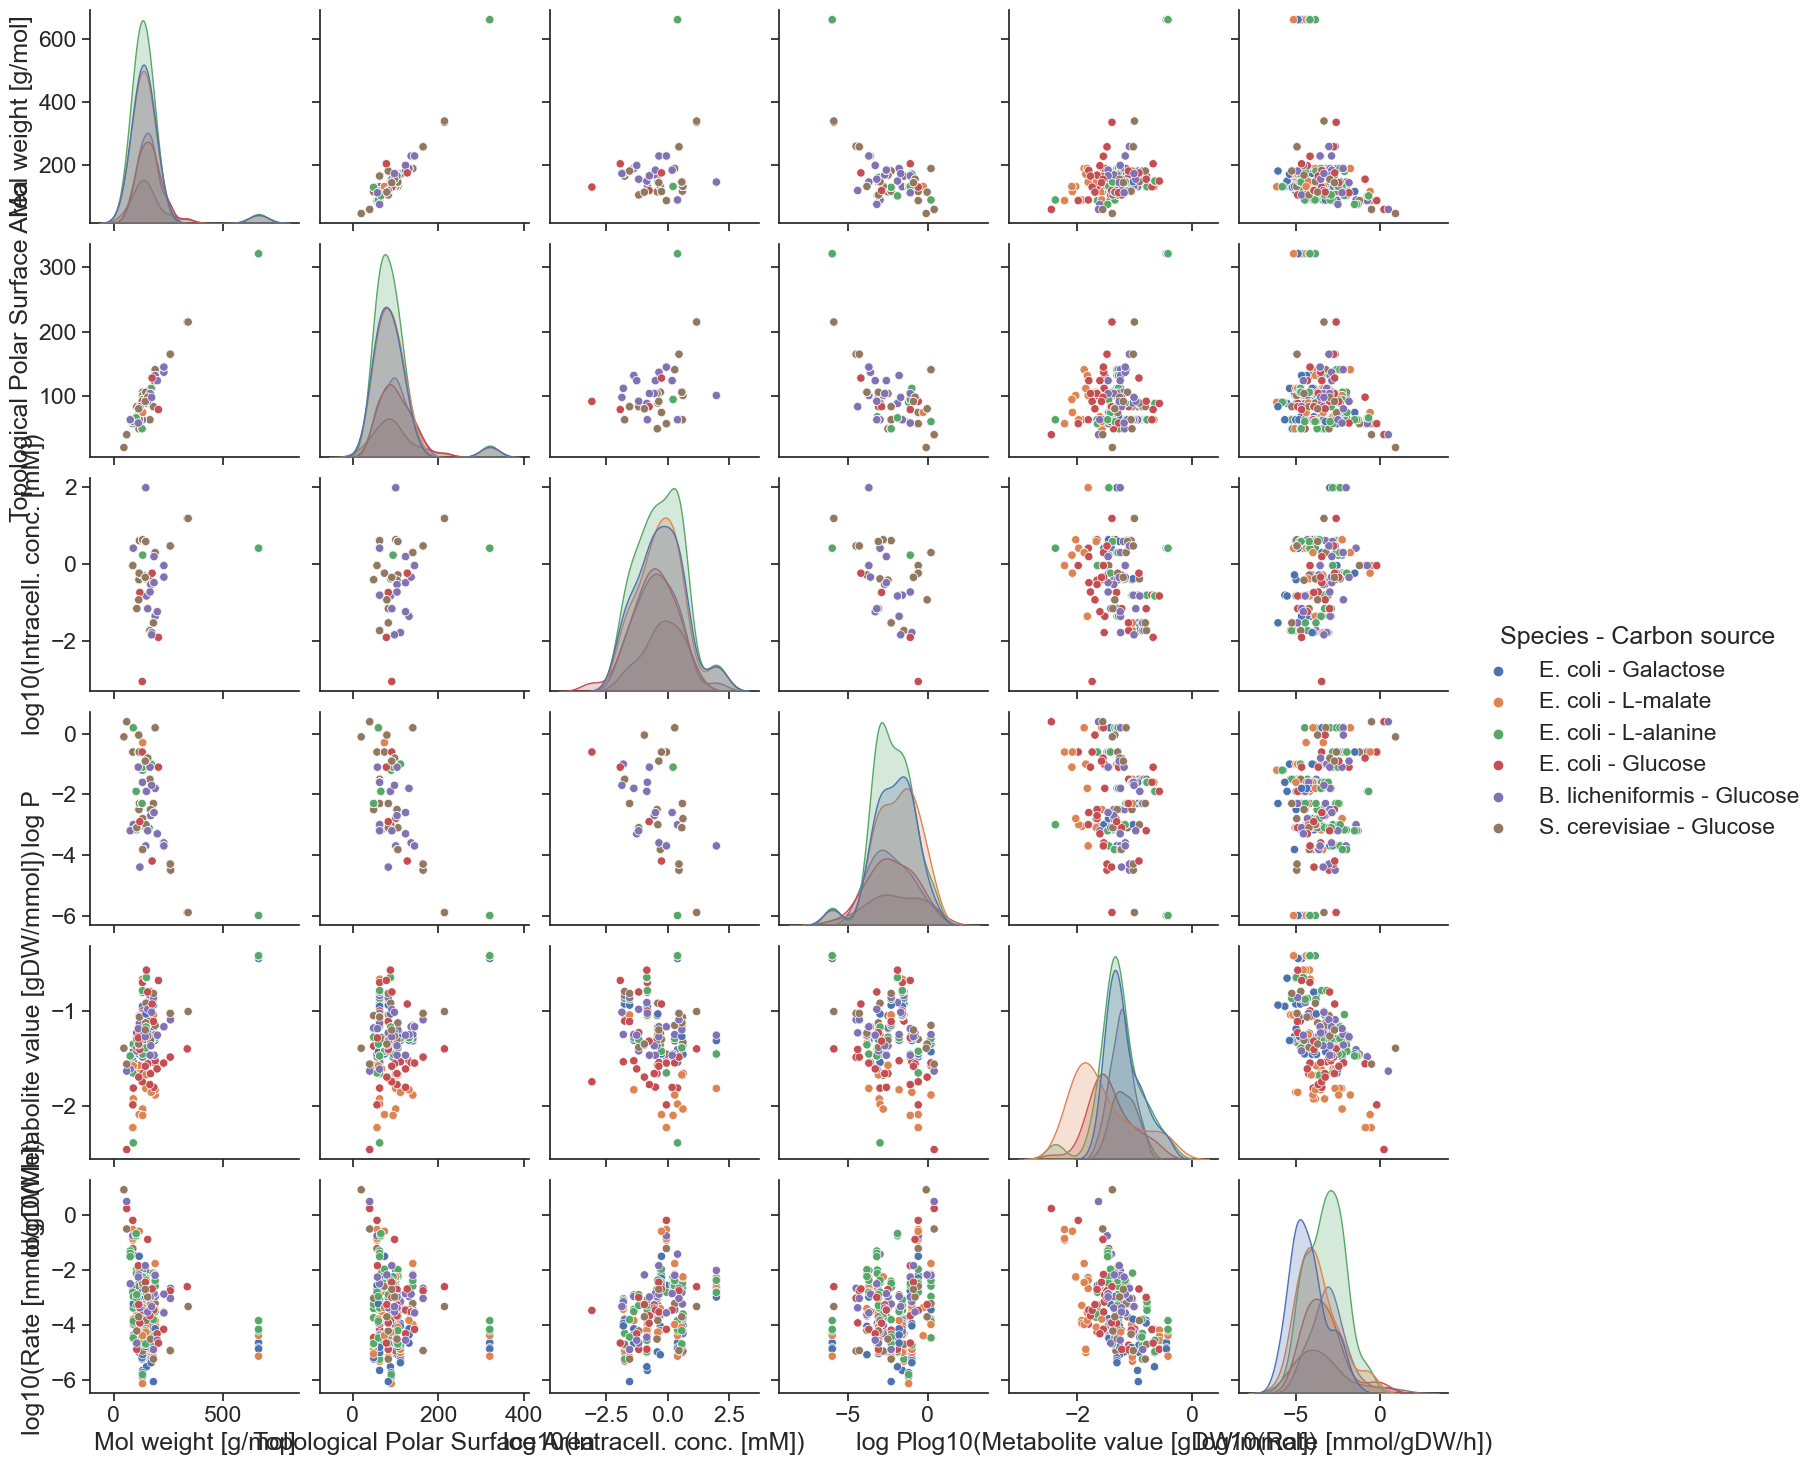

In [215]:
sns.pairplot(df_no_cg, x_vars=xvarsS, y_vars=xvarsS, hue = 'Species - Carbon source')
plt.show()

In [216]:
sns.pairplot(df_no_cg_no_nad, x_vars=xvarsS, y_vars=xvarsS, hue = 'Species - Carbon source')

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [217]:
sns.pairplot(df_no_cg, x_vars=xvarsS, y_vars=xvarsS, 
            kind="reg")

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [218]:
sns.pairplot(df_no_cg_no_nad, x_vars=xvarsS, y_vars=xvarsS, 
            kind="reg")

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


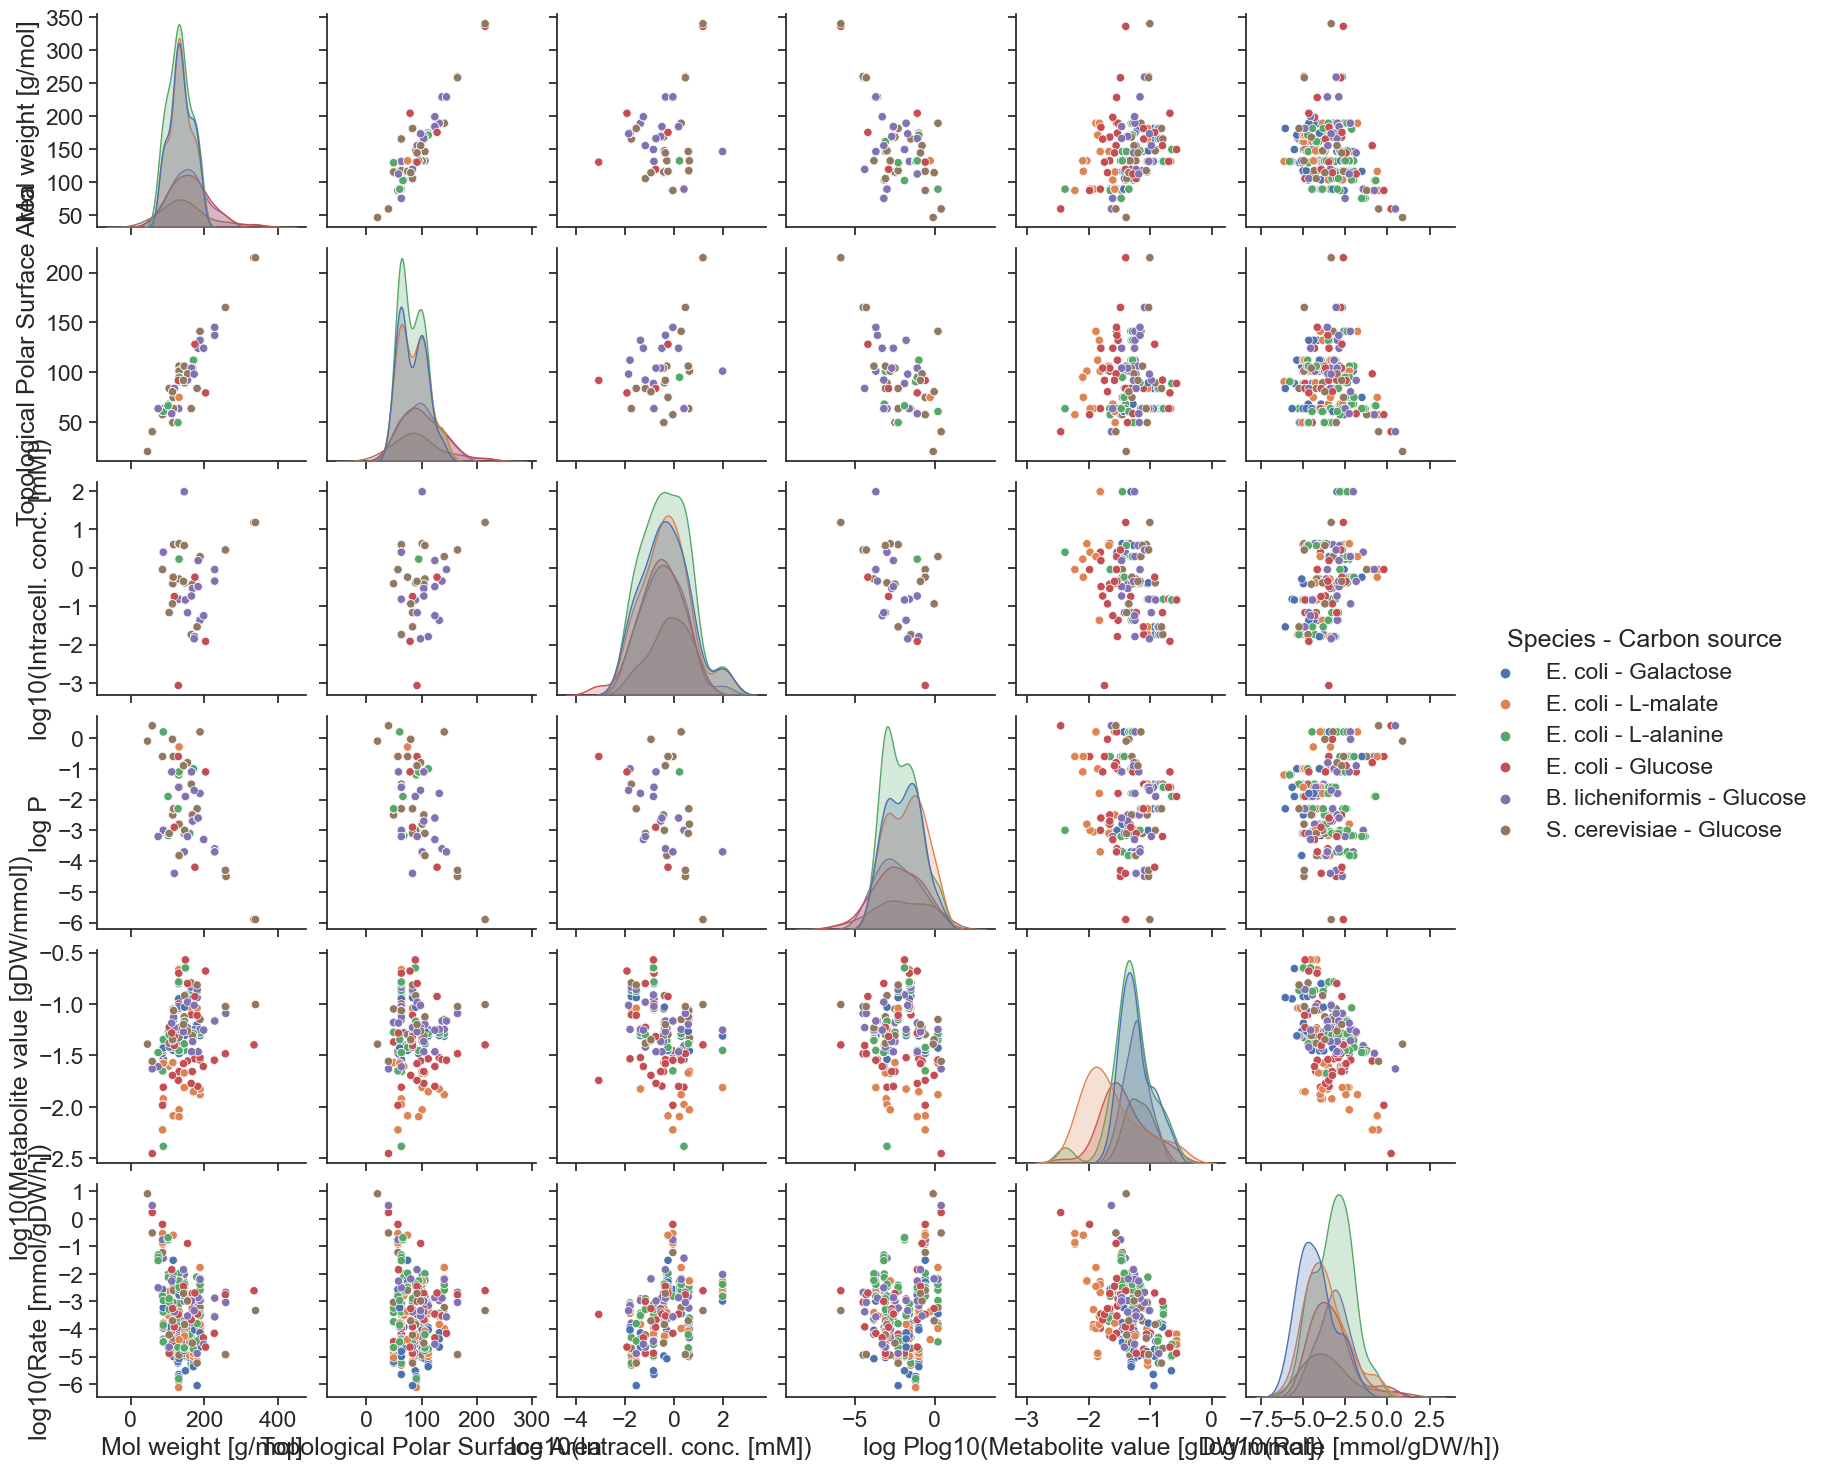

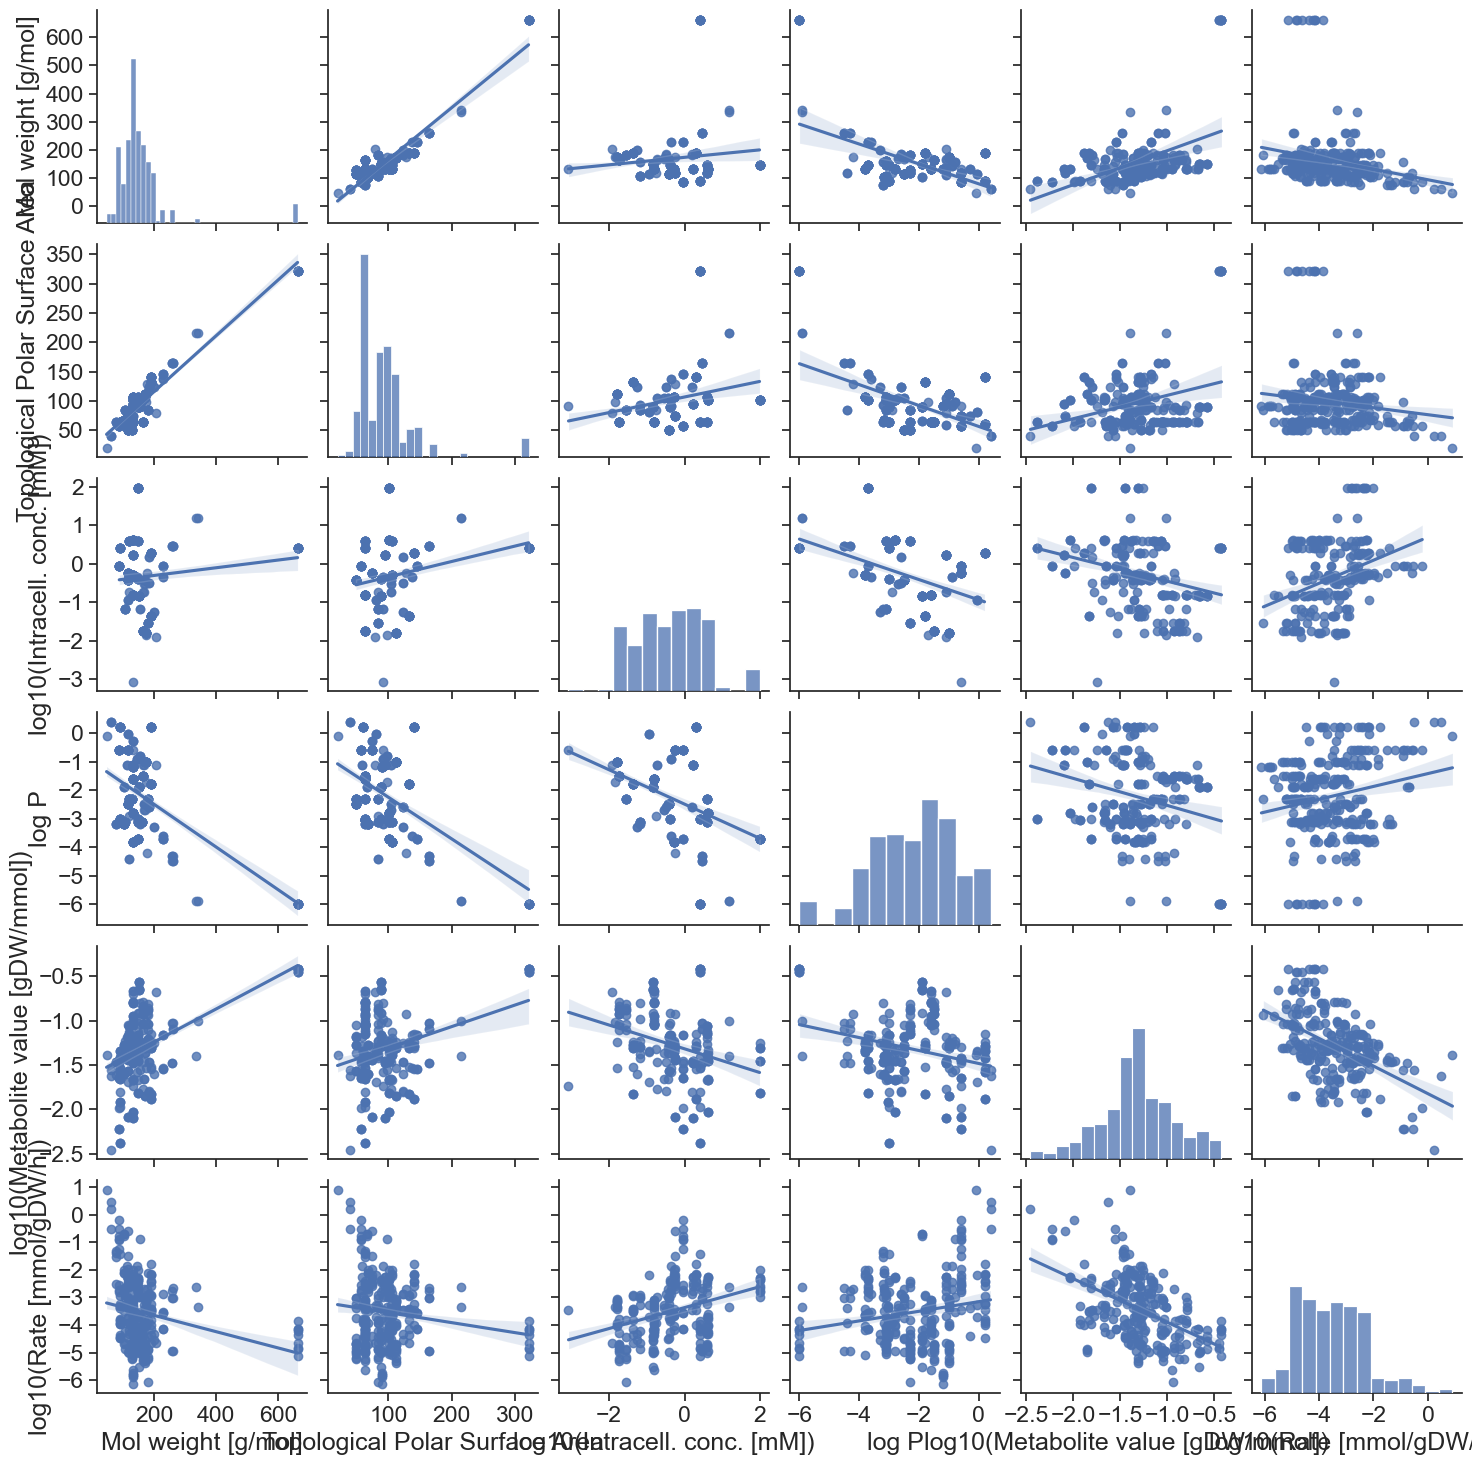

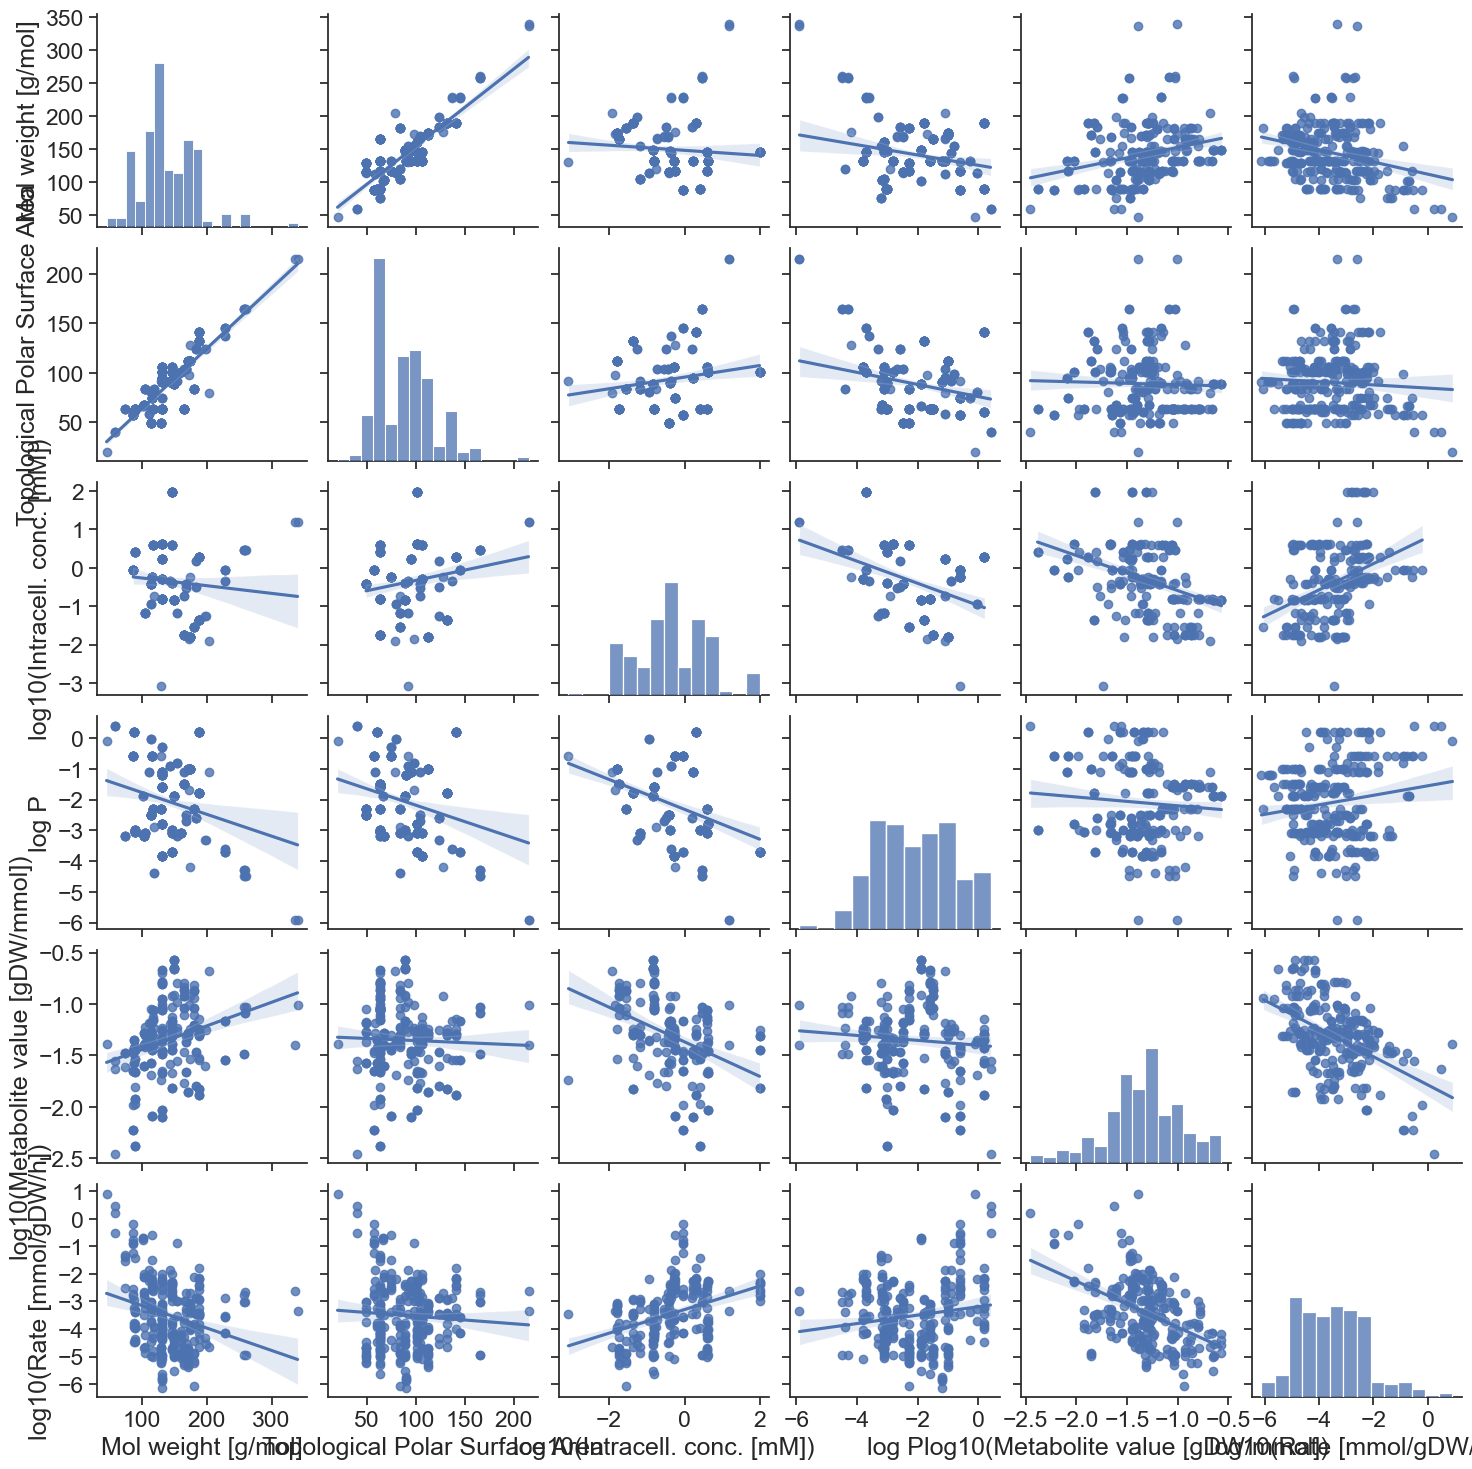

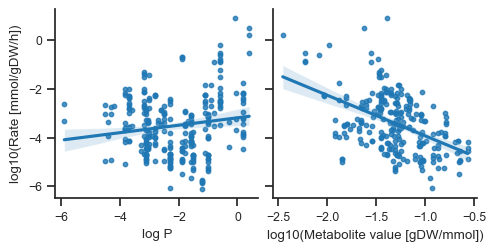

In [219]:
sns.set(font_scale = 0.8,style = 'ticks')
sns.pairplot(df_no_cg_no_nad, x_vars=xvarsS[-3:-1], 
            kind="reg", y_vars = ['log10(Rate [mmol/gDW/h])'], palette='tab20', 
             plot_kws={'scatter_kws':{'s':10}, 'color': '#1f77b4'})
plt.savefig('other_factors2.png', dpi = 400)
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


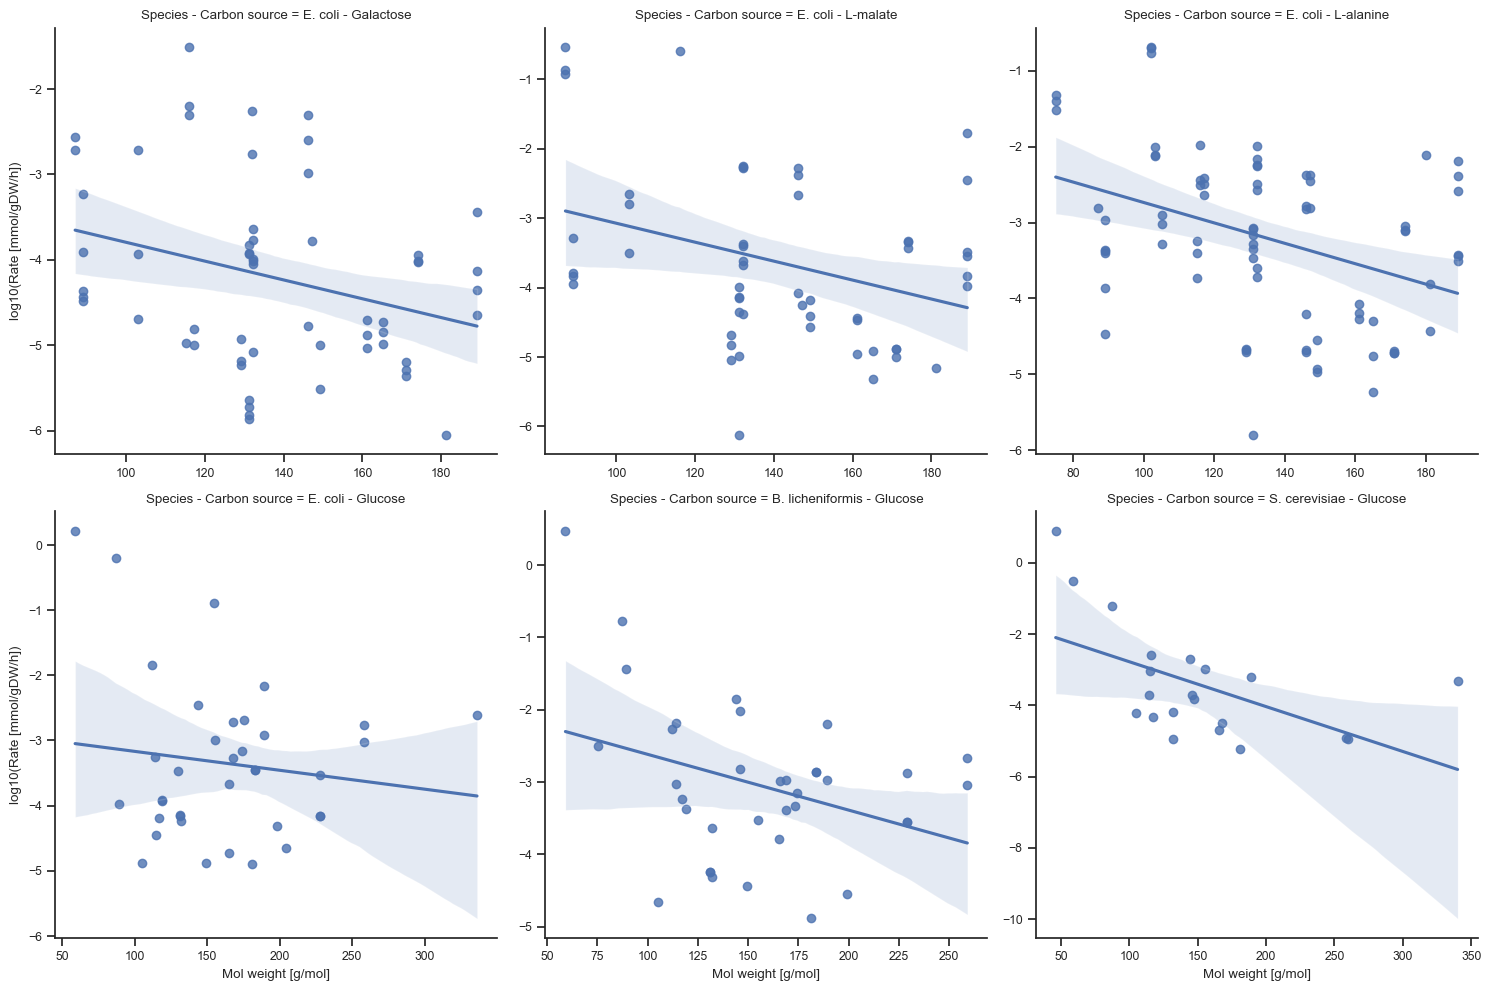

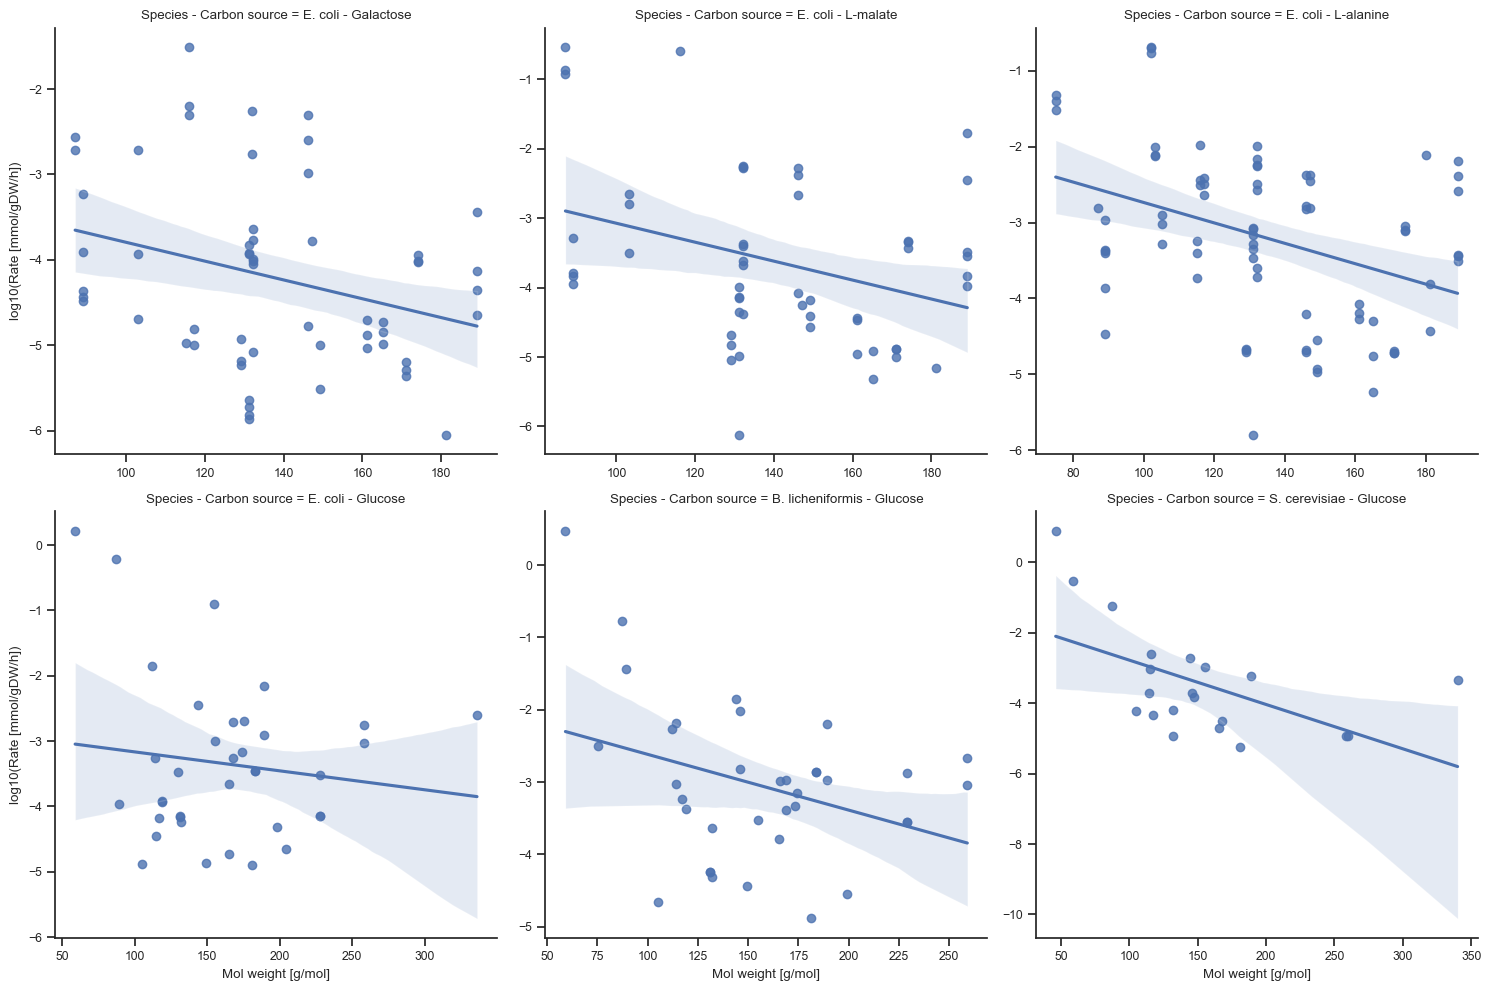

In [222]:
sns.lmplot(data = df_no_cg_no_nad, x = 'Mol weight [g/mol]', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})
plt.show()

In [224]:
# sns.lmplot(data=df_no_cg, y = 'log10(Intracellular concentration [mM])', x = 'log10(Metabolite value [gDW/mmol])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})
# plt.show()

# Rate distribution

In [225]:
from scipy import stats as st

In [226]:
fit = st.fit(st.norm, [x for x in df_no_cg['log10(Rate [mmol/gDW/h])'] if np.isfinite(x)],
             bounds = [[-5, -2], [0, 3]])
print(fit.params)

FitParams(loc=-3.4796599929613703, scale=1.251915497555727)


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1636: RuntimeWarning: overflow encountered in divide
  x = asarray((x-loc) / scale)


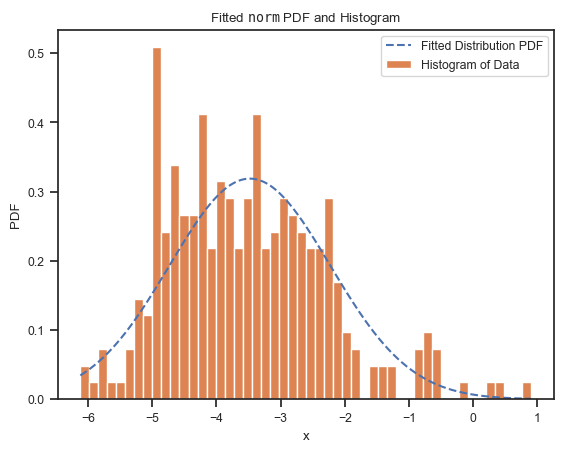

In [227]:
fit.plot()
plt.show()

In [228]:
df_no_cg[['Metabolite', 'Carbon source', 'Species', 'log10(Rate [mmol/gDW/h])','Rate [mmol/gDW/h]']].to_csv('D_rates_and_meta.csv')

In [229]:
df_no_cg['log10(Rate [mmol/gDW/h])'].to_csv('log10_rates.csv')
df_no_cg['Rate [mmol/gDW/h]'].to_csv('D_rates.csv')

In [230]:
x = np.linspace(-8, 1, 100)
dist = fit.pxf(x, loc = fit.params[0], scale = fit.params[1])

In [231]:
fit.params

FitParams(loc=-3.4796599929613703, scale=1.251915497555727)

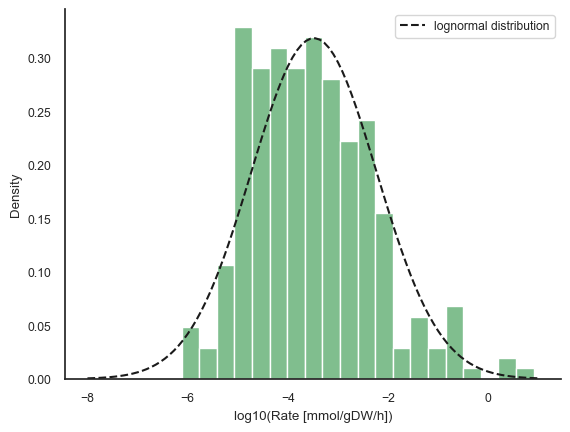

In [236]:
sns.set_style('white')
ax = sns.histplot(df_no_cg['log10(Rate [mmol/gDW/h])'], stat='density', palette='tab10', color='C2', bins = 20)
sns.lineplot(x = x, y = dist, ax = ax, color = 'k', ls = '--', label = 'lognormal distribution')
sns.move_legend(ax, loc = 1)
sns.despine()
plt.show()

In [234]:
# fit.plot(df_no_cg['log10(Rate [mmol/gDW/h])'])
# plt.show()

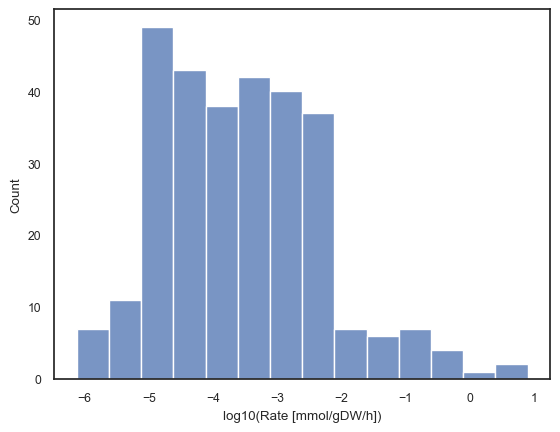

In [237]:
sns.histplot(df_no_cg['log10(Rate [mmol/gDW/h])'], color='C0')
plt.show()

# Linear model

In [243]:
import statsmodels.formula.api as sm

In [244]:
# idx = df_no_cg.Species == 'B. licheniformis'

In [238]:
df_ecoli = df.loc[df.Species == 'E. coli']

In [240]:
# np.isnan(df_no_cg[key]).sum()

In [241]:
xvarsL = ['Mol weight [g/mol]', 'Topological Polar Surface Area', 'log10(Intracell. conc. [mM])', 'log P', 'log10(Rate [mmol/gDW/h])','Charge','Phosphate',
       'log10(Metabolite value [gDW/mmol])','log10(Turnover [mmol/gDW/h])', 'Compound class']

In [245]:
var_explained = {}
for key in xvarsL:
    print(key)
    if key == 'log10(Rate [mmol/gDW/h])':
        continue
    lindf = pd.DataFrame()
    lindf['Y'] = df_ecoli['log10(Rate [mmol/gDW/h])']
    lindf['A'] = df_ecoli[key]
    print(lindf['A'])
    lindf.replace([np.inf, -np.inf], np.nan, inplace=True)
    lindf.dropna(inplace=True)
    # print(np.isnan(lindf['A']).sum())
    res = sm.ols(formula="Y ~ A", data=lindf).fit()
    res.summary()
    print(key, res.rsquared)
    var_explained[key] = res.rsquared_adj

Mol weight [g/mol]
0      165.18914
1      165.18914
2      165.18914
3      165.18914
4      165.18914
         ...    
331    155.08832
334    114.05628
337    112.08676
339    144.08226
342     59.04402
Name: A, Length: 269, dtype: float64
Mol weight [g/mol] 0.04514613479023788
Topological Polar Surface Area
0      63.3
1      63.3
2      63.3
3      63.3
4      63.3
       ... 
331    98.3
334    80.3
337    58.2
339    91.7
342    40.1
Name: A, Length: 269, dtype: float64
Topological Polar Surface Area 0.01258333047048954
log10(Intracell. conc. [mM])
0     -1.739929
1     -1.739929
2     -1.739929
3     -1.739929
4     -1.739929
         ...   
331         NaN
334   -0.939302
337         NaN
339   -0.353596
342         NaN
Name: A, Length: 269, dtype: float64
log10(Intracell. conc. [mM]) 0.12376155194390592
log P
0     -1.500
1     -1.500
2     -1.500
3     -1.500
4     -1.500
       ...  
331   -0.800
334   -0.041
337   -1.100
339   -0.900
342    0.400
Name: A, Length: 269, dtype

In [316]:
lindf = pd.DataFrame()
lindf['Y'] = df_ecoli['log10(Rate [mmol/gDW/h])']
lindf['A'] = df_ecoli['log10(Intracell. conc. [mM])']
lindf['B'] = df_ecoli['log10(Metabolite value [gDW/mmol])']
lindf['C'] = df_ecoli['Charge']
lindf['D'] = df_ecoli['Mol weight [g/mol]']
lindf['G'] = df_ecoli['Compound class']
lindf['E'] = df_ecoli['log P']
lindf['F'] = df_ecoli['log10(Turnover [mmol/gDW/h])']
lindf.replace([np.inf, -np.inf], np.nan, inplace=True)
lindf.dropna(inplace=True)
# lindf['F'] = df_no_cg['Mol weight [g/mol]']
# lindf['G'] = df_no_cg['Topological Polar Surface Area']
res = sm.ols(formula="Y ~ A + B + C + G", data=lindf).fit()
print(res.summary())
var_explained['Met. value + Int. conc + charge + compound class'] = res.rsquared_adj
print(var_explained)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.49
Date:                Tue, 14 May 2024   Prob (F-statistic):           9.77e-25
Time:                        15:20:30   Log-Likelihood:                -173.44
No. Observations:                 159   AIC:                             362.9
Df Residuals:                     151   BIC:                             387.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [317]:
s = res.summary2()
print(s)
s.tables[1].to_csv('linear_model.csv')

                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.549   
Dependent Variable:       Y                     AIC:                     362.8740
Date:                     2024-05-14 15:21      BIC:                     387.4253
No. Observations:         159                   Log-Likelihood:          -173.44 
Df Model:                 7                     F-statistic:             28.49   
Df Residuals:             151                   Prob (F-statistic):      9.77e-25
R-squared:                0.569                 Scale:                   0.54626 
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                        -4.5900   0.2834 -16.1966 0.0000 -5.1500 -4.0301
G[T.Carboxylic acid]              1.8758 

In [248]:
np.sqrt(res.mse_resid)

0.7390959841518047

In [249]:
np.std(res.resid)

0.7202624169855991

In [250]:
res.resid

0     -0.156330
1     -0.300170
2     -0.035451
3     -0.323977
4     -0.713959
         ...   
327    0.331332
328    1.514462
330    0.805945
334   -0.592064
339    0.609125
Length: 159, dtype: float64

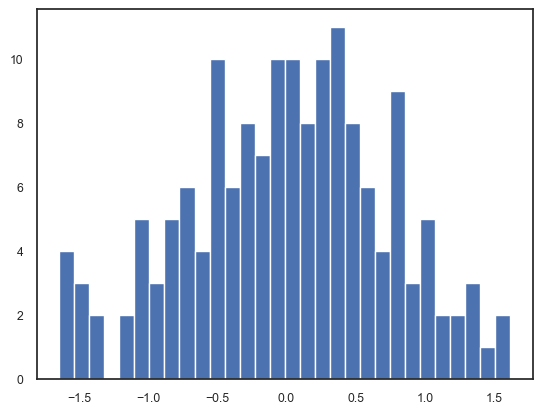

In [251]:
plt.hist(res.resid, bins=30)
plt.show()

In [252]:
order = [k for k, v in sorted(var_explained.items(), key=lambda item: item[1])]

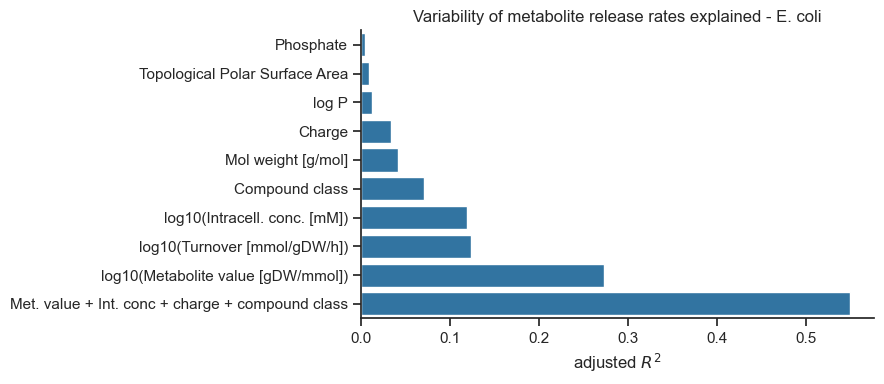

In [268]:
sns.set(font_scale = 1, style = 'ticks')
keys = list(var_explained.keys())
# get values in the same order as keys, and parse percentage values
fig, ax = plt.subplots(1,1, figsize = (9, 4))
vals = list(var_explained.values())
sns.barplot(y=keys, x=vals, color = '#1f77b4', order = order, ax = ax)
plt.xlabel(r'adjusted $R^2$')
sns.despine()
plt.title('Variability of metabolite release rates explained - E. coli')
plt.tight_layout()
plt.savefig('barplot_ecoli.png', dpi = 400)

plt.show()

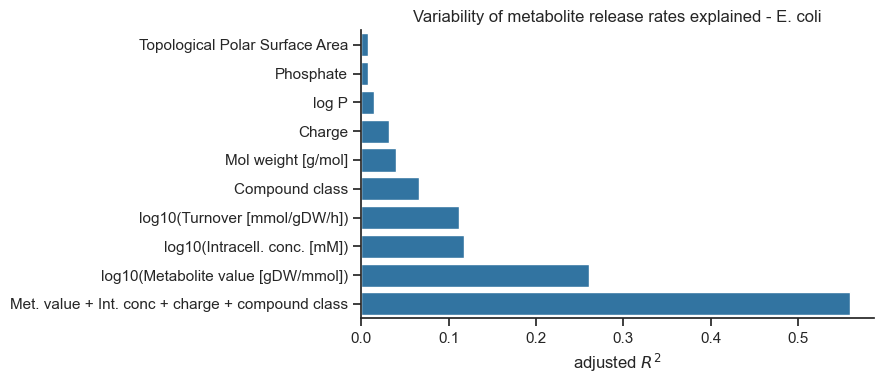

In [183]:
sns.set(font_scale = 1, style = 'ticks')
keys = list(var_explained.keys())
# get values in the same order as keys, and parse percentage values
fig, ax = plt.subplots(1,1, figsize = (9, 4))
vals = list(var_explained.values())
sns.barplot(y=keys, x=vals, color = '#1f77b4', order = order, ax = ax)
plt.xlabel(r'adjusted $R^2$')
sns.despine()
plt.title('Variability of metabolite release rates explained - E. coli')
plt.tight_layout()
plt.savefig('barplot_ecoli.png', dpi = 400)

plt.show()

In [117]:
xvarsL = ['Mol weight [g/mol]', 'Topological Polar Surface Area', 'log10(Intracell. conc. [mM])', 'log P', 'log10(Rate [mmol/gDW/h])','Charge','Phosphate',
       'log10(Metabolite value [gDW/mmol])','log10(Turnover [mmol/gDW/h])']

In [48]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset', 'Yeast ID',
       'Model metabolite name', 'Mass', 'Metabolite id', 'Charge', 'Phosphate',
       'Topological Polar Surface Area', 'Intracellular concentration',
       'log P', 'Compound class', 'log10(Rate [mmol/gDW/h])',
       'log10(Metabolite value [gDW/mmol])', 'Rate [mmol C/gDW/h]',
       'Rate [g/gDW/h]', 'Metabolite value [gDW/mmol C]',
       'Metabolite value [gDW/g]', 'log10(Rate [mmol C/gDW/h])',
       'log10(Rate [g/gDW/h])', 'log10(Metabolite value [gDW/mmol C])',
       'log10(Metabolite value [gDW/g])', 'Species - Carbon source',
       'log10(Intracellular concentration [mM])'],
      dtype='object')

# Fix mapping

In [118]:
minfo3 = pd.read_excel('../data/met_info_3.xlsx')
minfo2 = pd.read_csv('../data/met_info_curated_211.csv', encoding = "ISO-8859-1", index_col = 0)

In [121]:
dic = minfo2.set_index('Metabolite name').to_dict(orient = 'index')

In [129]:
minfom = pd.merge(left = minfo3, right = minfo2, left_on = 'Metabolite', right_on = 'Metabolite name', how = 'left')

In [130]:
minfom.to_csv('../data/met_info_3.csv')